In [1]:
# 命名したclusterでプロット後、各サンプルごとに各クラスターを集計する関数
# data=seurat.object(clusterプロット直後)
# types=cluster名(重複可)
cluster_count_function <- function(data,types){ 
    samplename <- c(unique(data[[]]$orig.ident))
    types2 <- unique(types)
    
    data <- AddMetaData(
    object=data,
    metadata=Idents(data),
    col.name='cell_type')
    
    # 入れ物用意
    values <- rep(0,length(samplename))
    names(values) <- samplename
    values <- t(as.data.frame(values))
    
    # countする
    for(i in 1:length(types2)){
    cr <- c()
        for(j in 1:length(samplename)){
            cr <- c(cr,dim(data[[]] %>% filter(cell_type==types2[i])%>% filter(orig.ident==samplename[j])
                %>%select(orig.ident))[1])
        }
    values <- rbind(values,cr)
    }
    rownames(values) <- c('emp',types2)
    cluster_count <- values[-1,]
    return(cluster_count)
    }

In [2]:
getwd()

[1] "/home/tsubosaka/stomach_normal_marker"

In [4]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Welcome to enrichR
Checking connection ... Connection is Live!


In [5]:
library(schex)

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:Matrix’:

    which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, M

In [3]:
all <- readRDS('seurat_object/N-stomach-all.rds')

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3


In [7]:
reticulate::import(module='umap')

Module(umap)

In [6]:
UMAP <- function(data.integrated, dims=1:30){
    data.integrated <- RunPCA(data.integrated, verbose = FALSE)
    data.integrated <- RunUMAP(data.integrated, dims = 1:30, verbose = FALSE, umap.method = 'umap-learn', metric = 'correlation')
    data.integrated <- FindNeighbors(data.integrated, dims = 1:30, verbose = FALSE)
    data.integrated <- FindClusters(data.integrated, verbose = FALSE)
    return (data.integrated)
}

In [8]:
endo <- readRDS('seurat_object//N-stomach-endothelium.rds')

In [9]:
endo

An object of class Seurat 
33538 features across 426 samples within 1 assay 
Active assay: RNA (33538 features)
 2 dimensional reductions calculated: pca, umap

In [10]:
remove_samples <- function(data, sample_name){
    Idents(data) <- 'orig.ident'
    data <- subset(data, idents=sample_name,invert=TRUE)
    Idents(data) <- 'seurat_clusters'
    return (data)
}

In [13]:
all <- remove_samples(all,'18N-total')
endo <- remove_samples(endo,'18N-total')

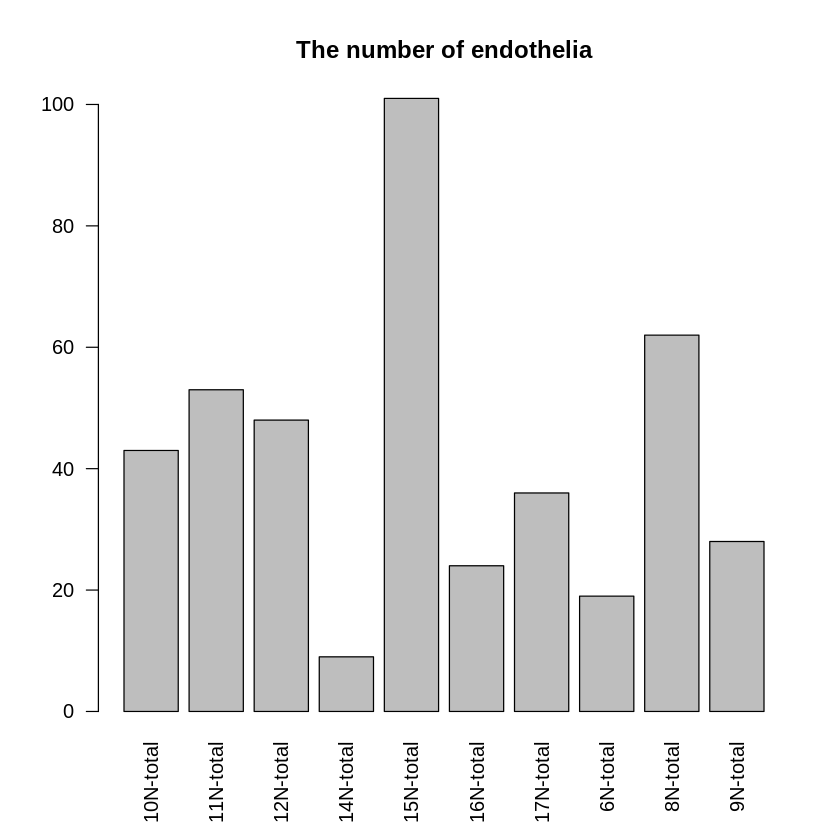

In [16]:
barplot(table(endo[[]]$orig.ident),las=2,xlab = ' ',main = 'The number of endothelia')

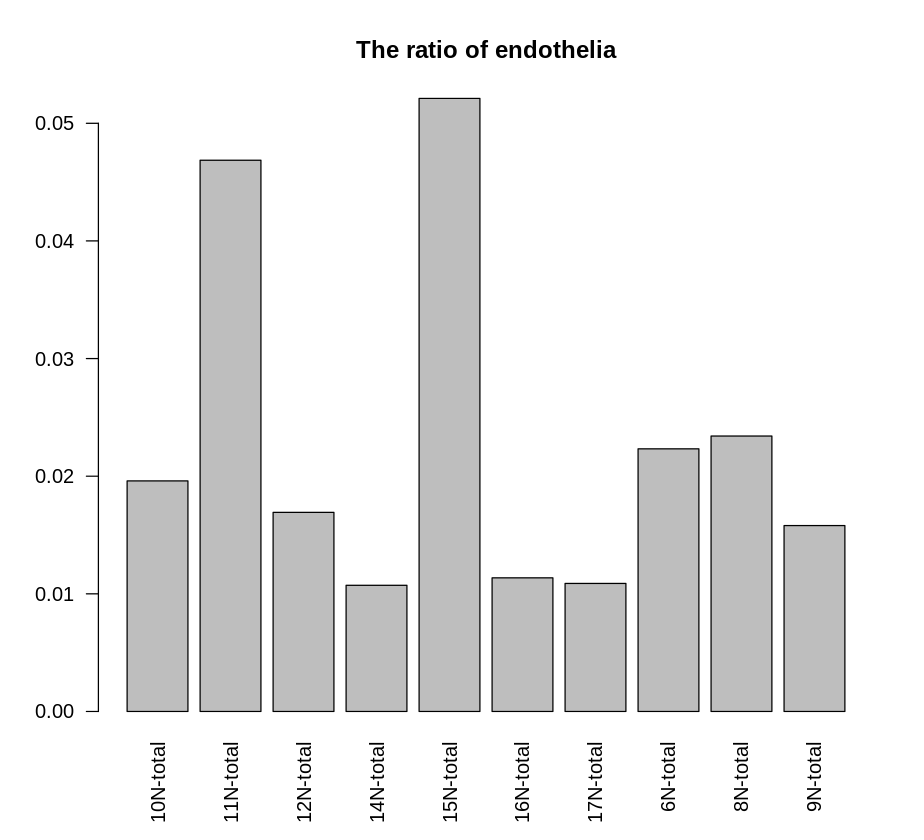

In [62]:
barplot(table(endo[[]]$orig.ident)/table(all[[]]$orig.ident),las=2,xlab = ' ',main = 'The ratio of endothelia')

In [19]:
endo.markers <- FindAllMarkers(endo, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5


In [24]:
endo.markers %>% head

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
PTMA,4.818628e-04,0.2658955,0.895,0.896,1.000000e+00,0,PTMA
ATP1B3,5.641548e-04,1.2455895,0.323,0.221,1.000000e+00,0,ATP1B3
EEF1A1,1.131401e-03,0.4027259,0.694,0.702,1.000000e+00,0,EEF1A1
FKBP1A,1.978093e-03,0.5198974,0.621,0.595,1.000000e+00,0,FKBP1A
SEC11A,3.885997e-03,0.8587959,0.282,0.187,1.000000e+00,0,SEC11A
PLVAP,1.338019e-18,1.0190968,0.804,0.324,4.487447e-14,1,PLVAP


In [23]:
for (i in 0:5){
    print(endo.markers %>% filter(p_val_adj<0.05) %>% filter(cluster==i))
    print(' ')
    print(' ')
    print(' ')
    }

[1] p_val     avg_logFC pct.1     pct.2     p_val_adj cluster   gene     
<0 rows> (or 0-length row.names)
[1] " "
[1] " "
[1] " "
          p_val avg_logFC pct.1 pct.2    p_val_adj cluster    gene
1  1.338019e-18 1.0190968 0.804 0.324 4.487447e-14       1   PLVAP
2  4.109670e-13 1.0401885 0.676 0.333 1.378301e-08       1    FLT1
3  1.343678e-11 1.1363084 0.627 0.324 4.506426e-07       1     GSN
4  2.640192e-10 0.9400394 0.608 0.277 8.854677e-06       1    RGCC
5  7.820115e-09 1.2413284 0.588 0.315 2.622710e-04       1    INSR
6  1.403003e-08 1.1300343 0.510 0.271 4.705391e-04       1   PLPP1
7  3.764060e-08 0.8034392 0.588 0.312 1.262390e-03       1   CD320
8  6.032731e-08 0.9156903 0.608 0.371 2.023257e-03       1   TIMP3
9  6.558810e-08 0.5378215 0.863 0.623 2.199694e-03       1   GNG11
10 7.987831e-08 1.0863275 0.461 0.218 2.678959e-03       1    CD36
11 8.511652e-08 0.3083714 0.971 0.950 2.854638e-03       1     B2M
12 1.785488e-07 0.9565707 0.451 0.224 5.988171e-03       1     KD

In [35]:
write.csv(endo.markers,file='seurat_object/endo_markers.csv')

In [27]:
marker1 <- c('PLVAP','FLT1','GSN','RGCC','INSR','PLPP1')

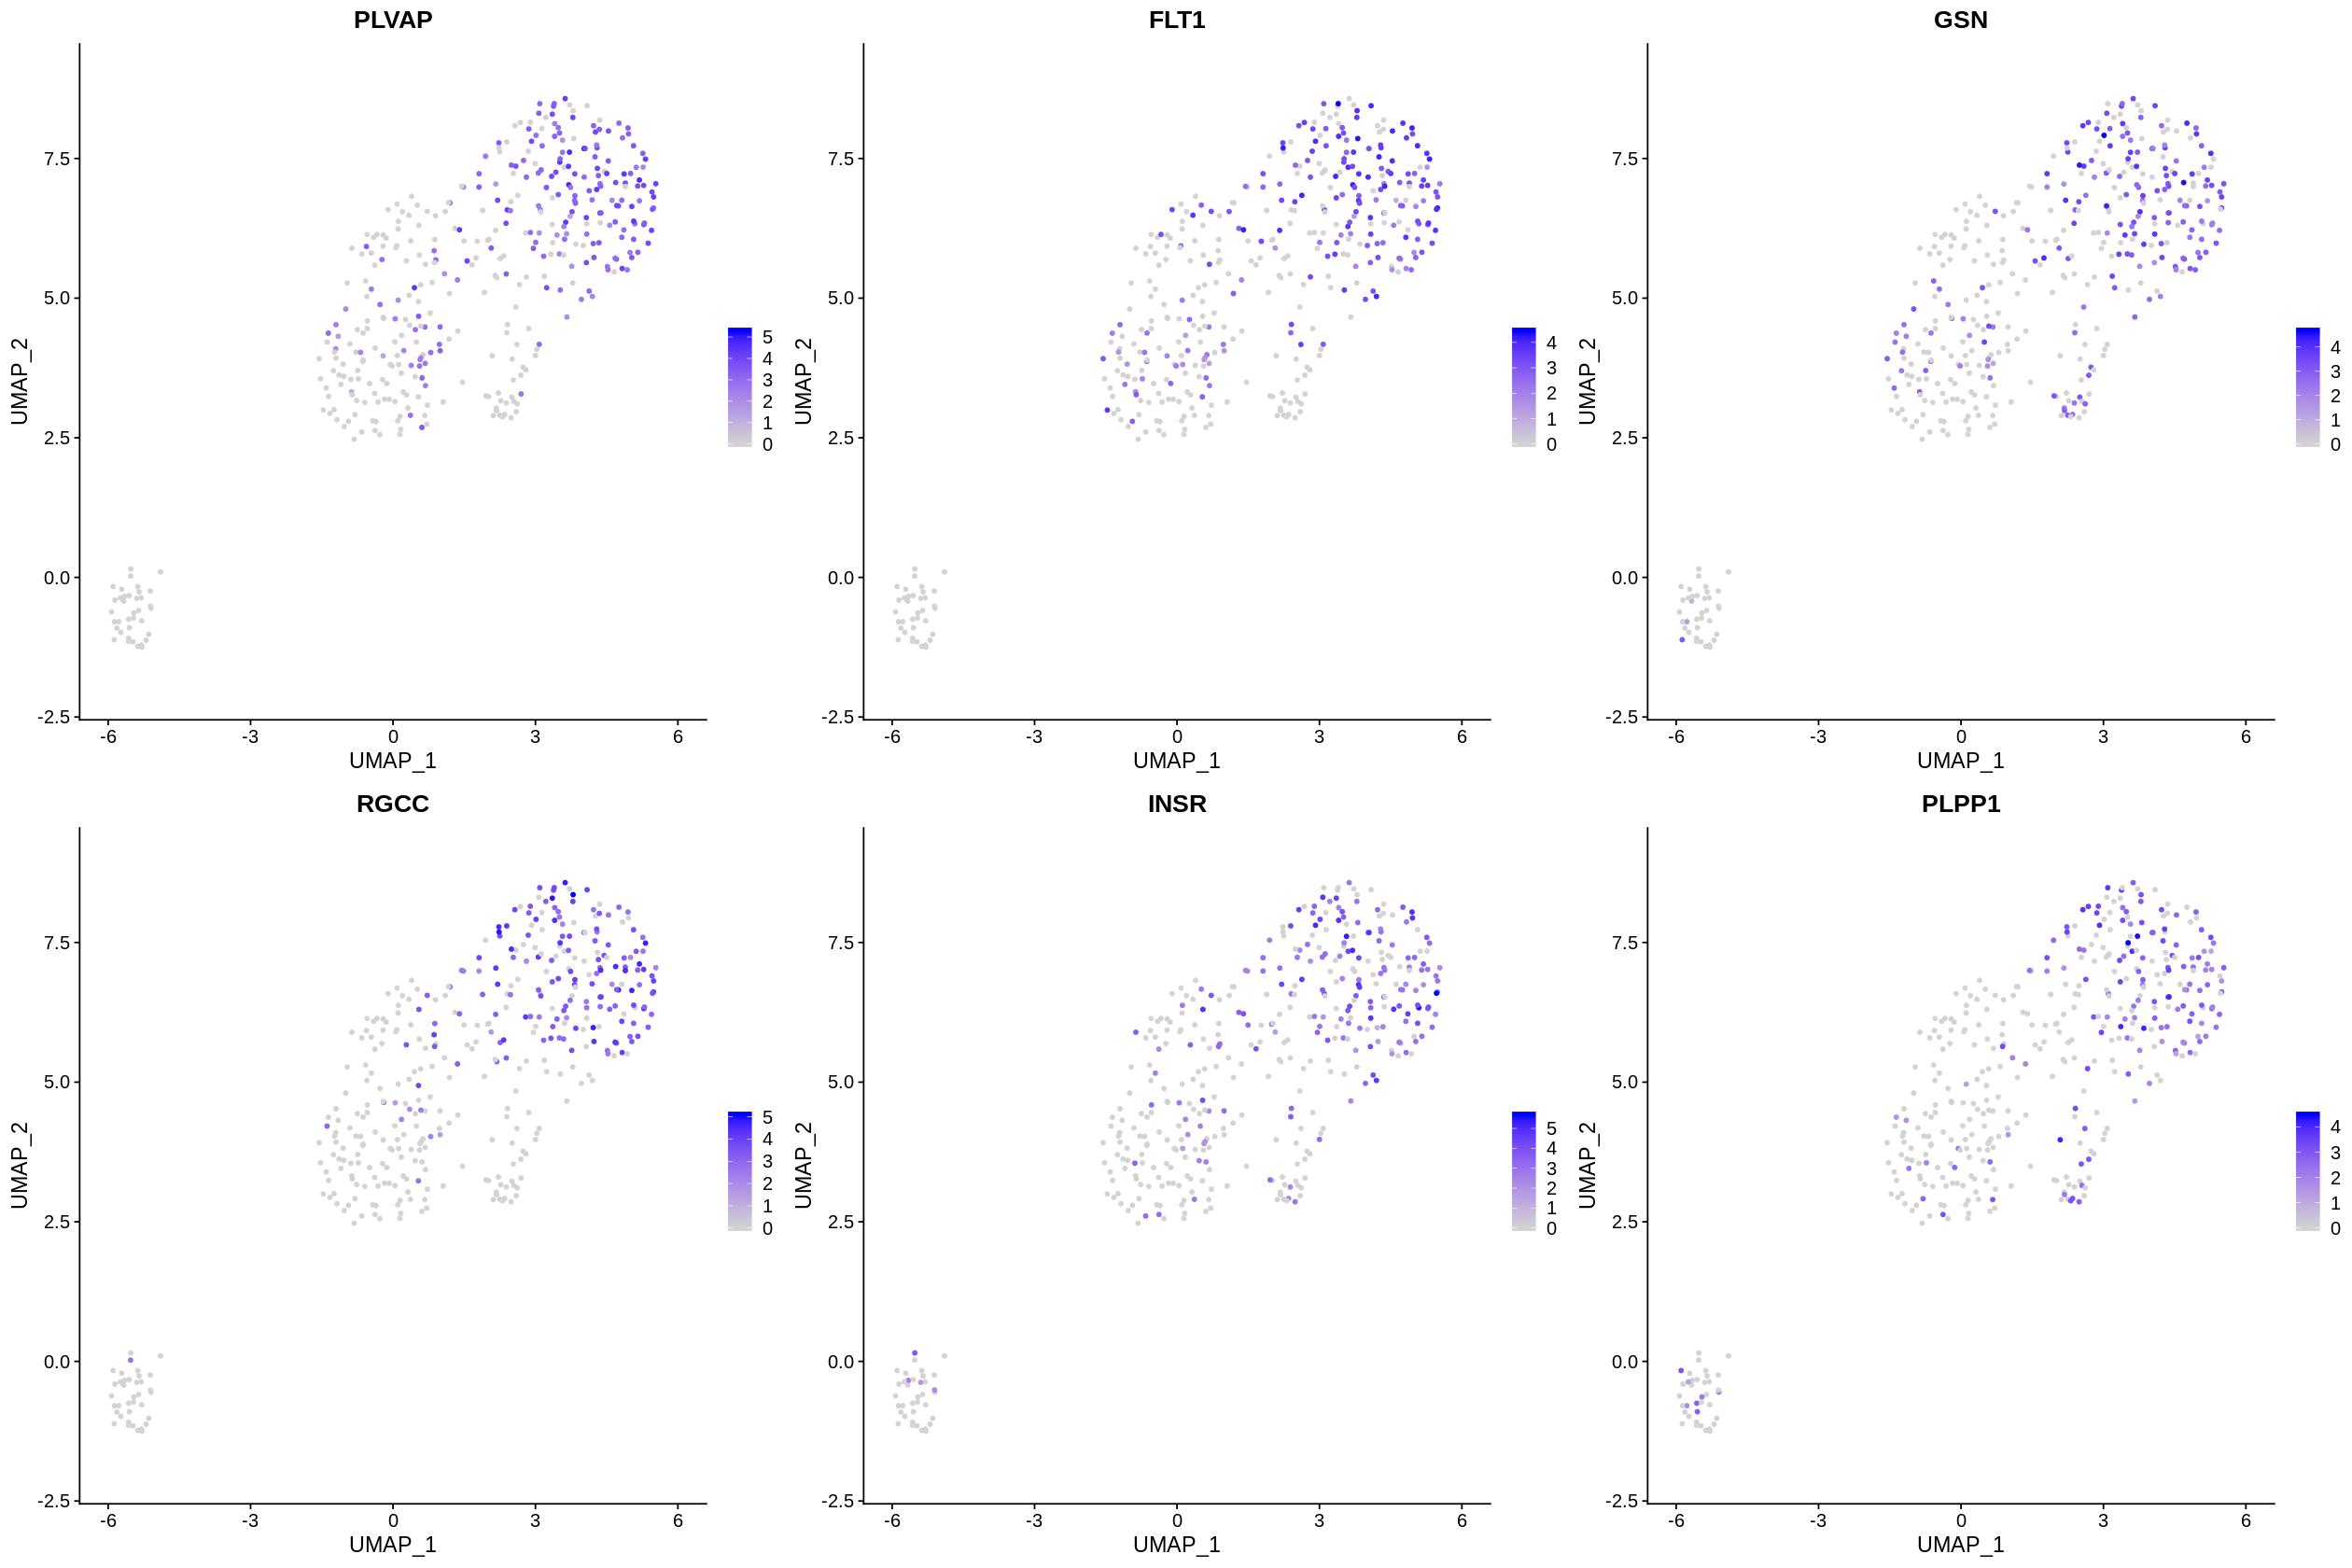

In [28]:
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(endo,features=marker1,ncol=3)
options(repr.plot.width=7, repr.plot.height=7)

In [30]:
FindMarkers(endo, ident.1 = 3, ident.2=1, only.pos=TRUE)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SHANK3,5.216785e-14,1.2881386,0.526,0.020,1.749605e-09
COL4A2,3.468886e-11,0.8680964,0.842,0.225,1.163395e-06
NTN4,1.160541e-09,0.6967587,0.509,0.059,3.892224e-05
MIR4435-2HG,2.738292e-09,1.1288419,0.474,0.059,9.183682e-05
IGFBP3,4.562227e-09,0.7716096,0.368,0.020,1.530080e-04
ARPC2,7.073038e-09,0.9651930,0.509,0.078,2.372155e-04
SERPINE1,1.058542e-08,0.8761181,0.456,0.059,3.550138e-04
ESAM,2.120680e-08,0.8244217,0.632,0.157,7.112335e-04
SKP1,3.638155e-08,0.7626278,0.632,0.137,1.220164e-03


In [31]:
marker2 <- c('CPE',
            'ACKR1',
            'ADGRG6',
            'C7',
            'CLU',
            'CCL14',
            'IL1R1',
            'POSTN',
            'CYP1B1')

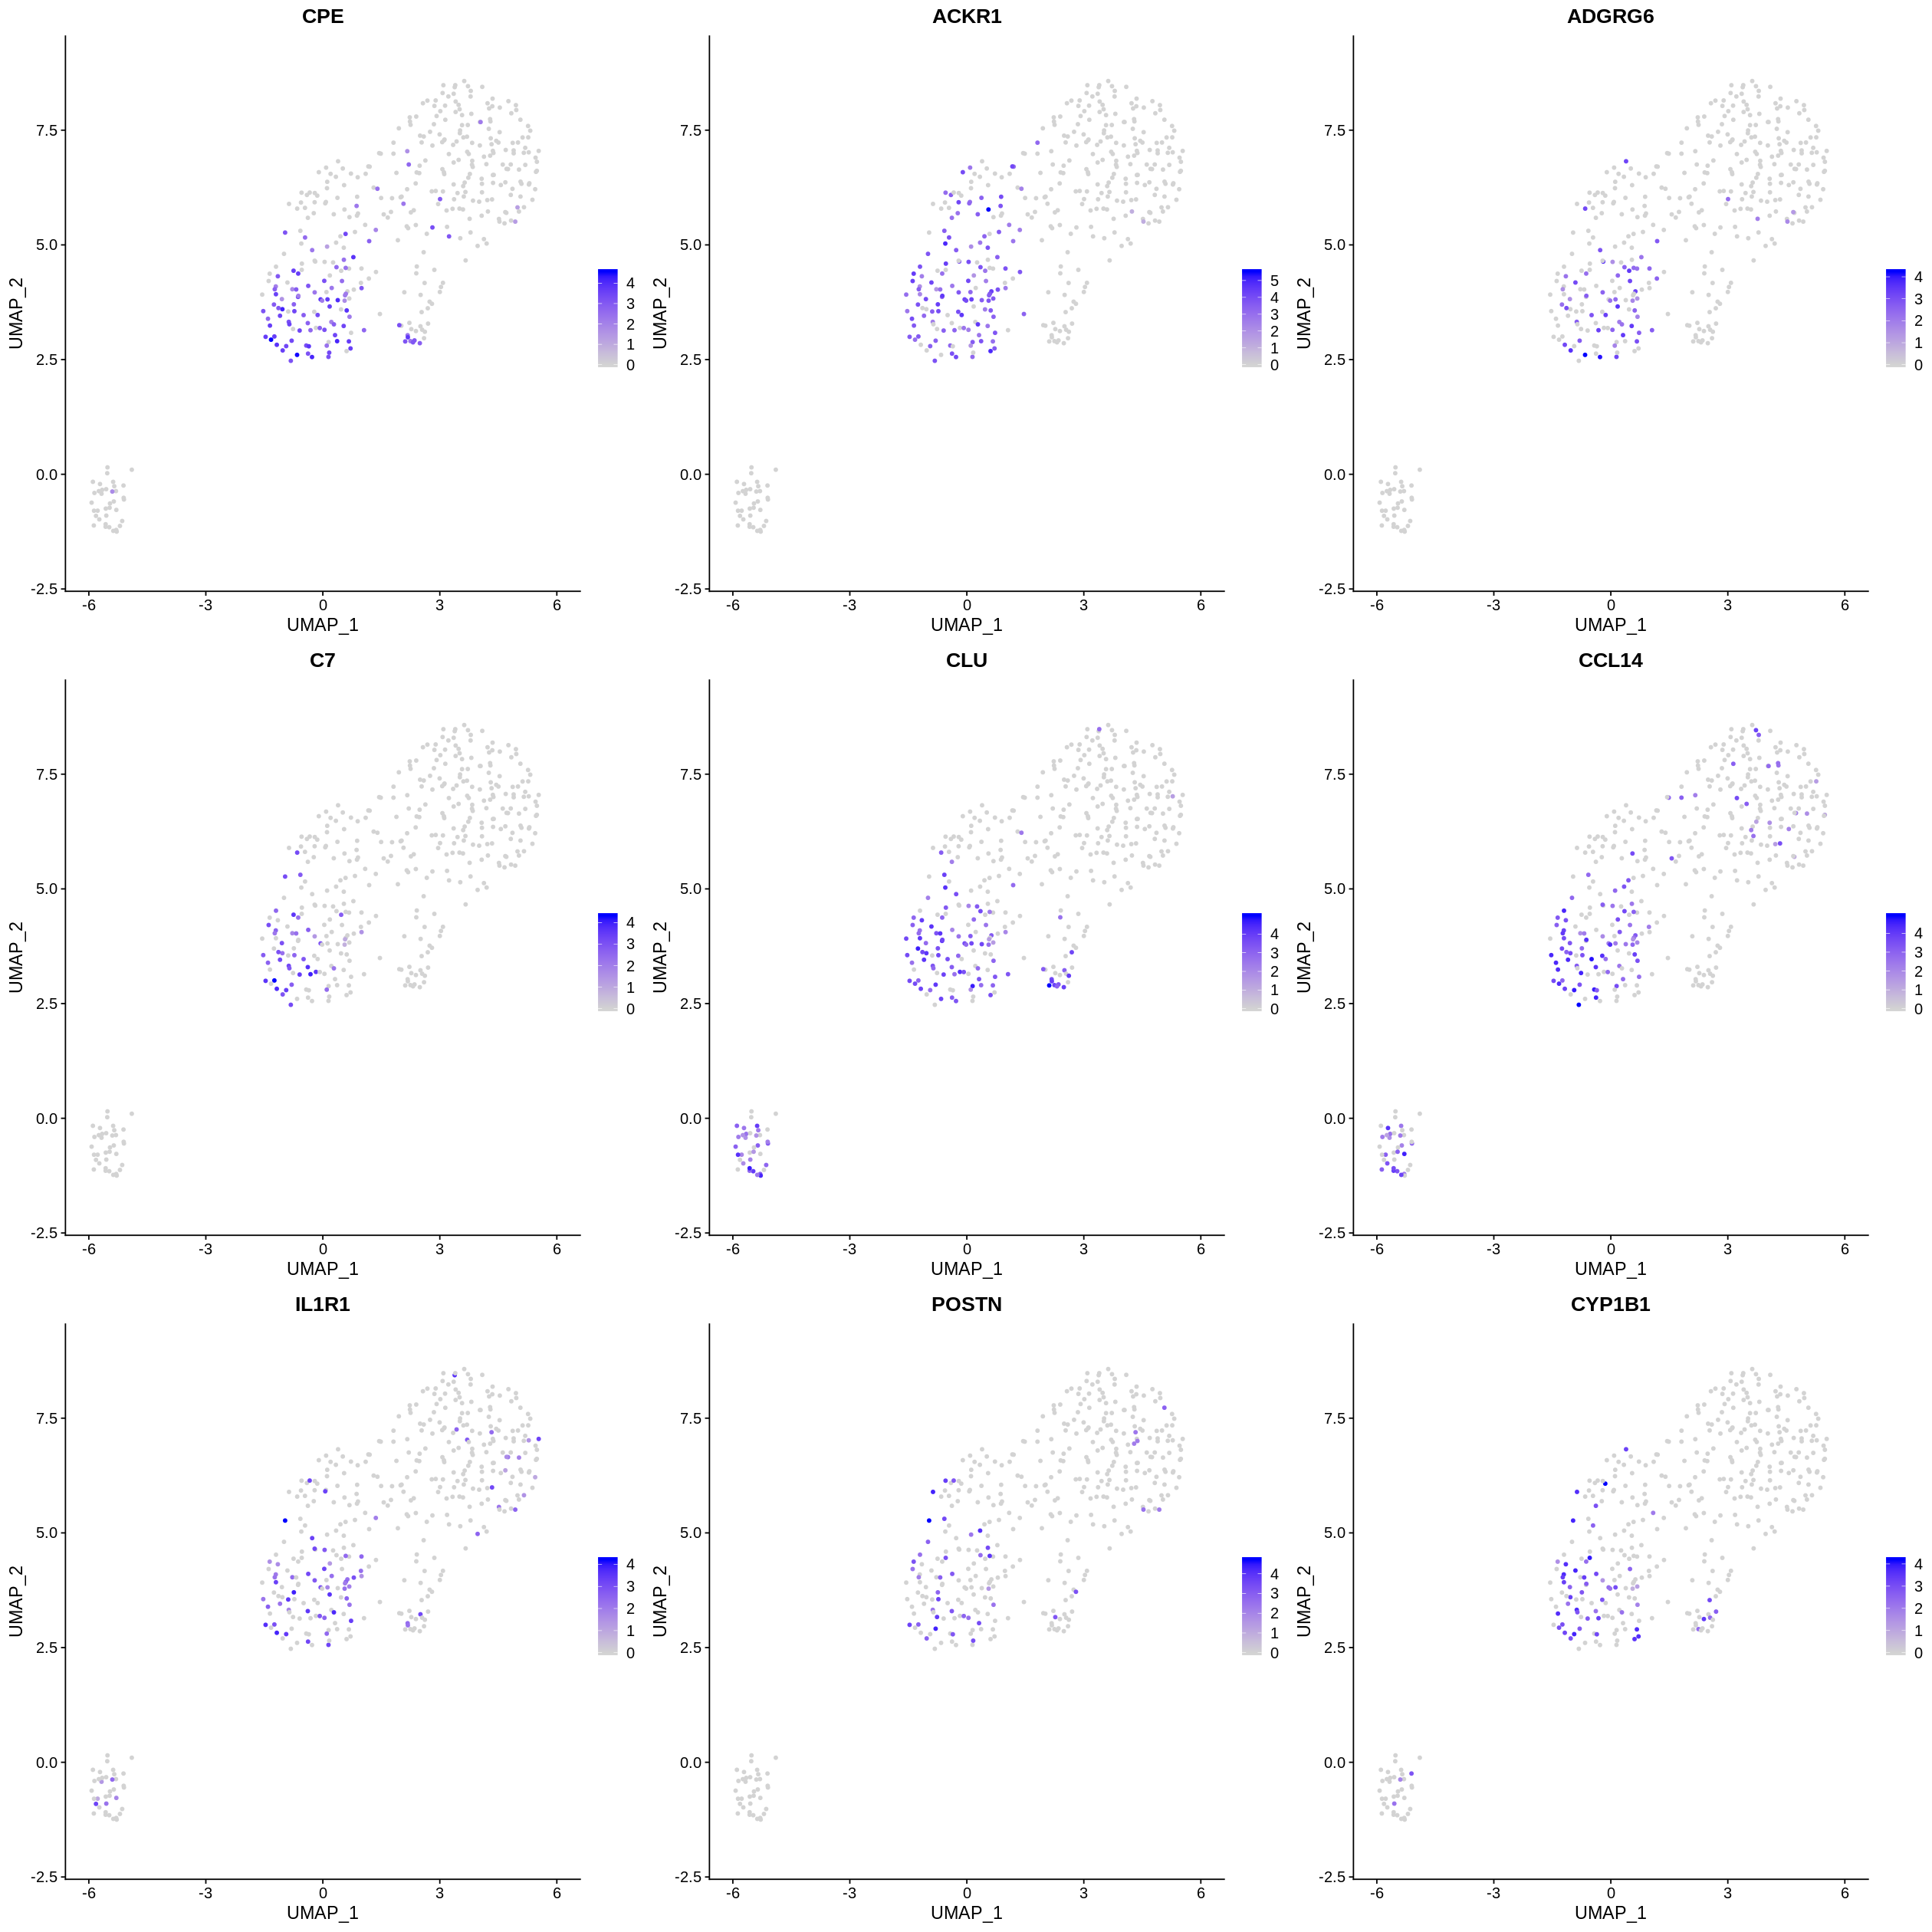

In [33]:
options(repr.plot.width=7*3, repr.plot.height=7*3)
FeaturePlot(endo,features=marker2,ncol=3)
options(repr.plot.width=7, repr.plot.height=7)

Warning message in FeaturePlot(endo, features = c("RAMP3", "EDNRB", "CLDN5", "ACKR1", :
“All cells have the same value (0) of TMEM252.”

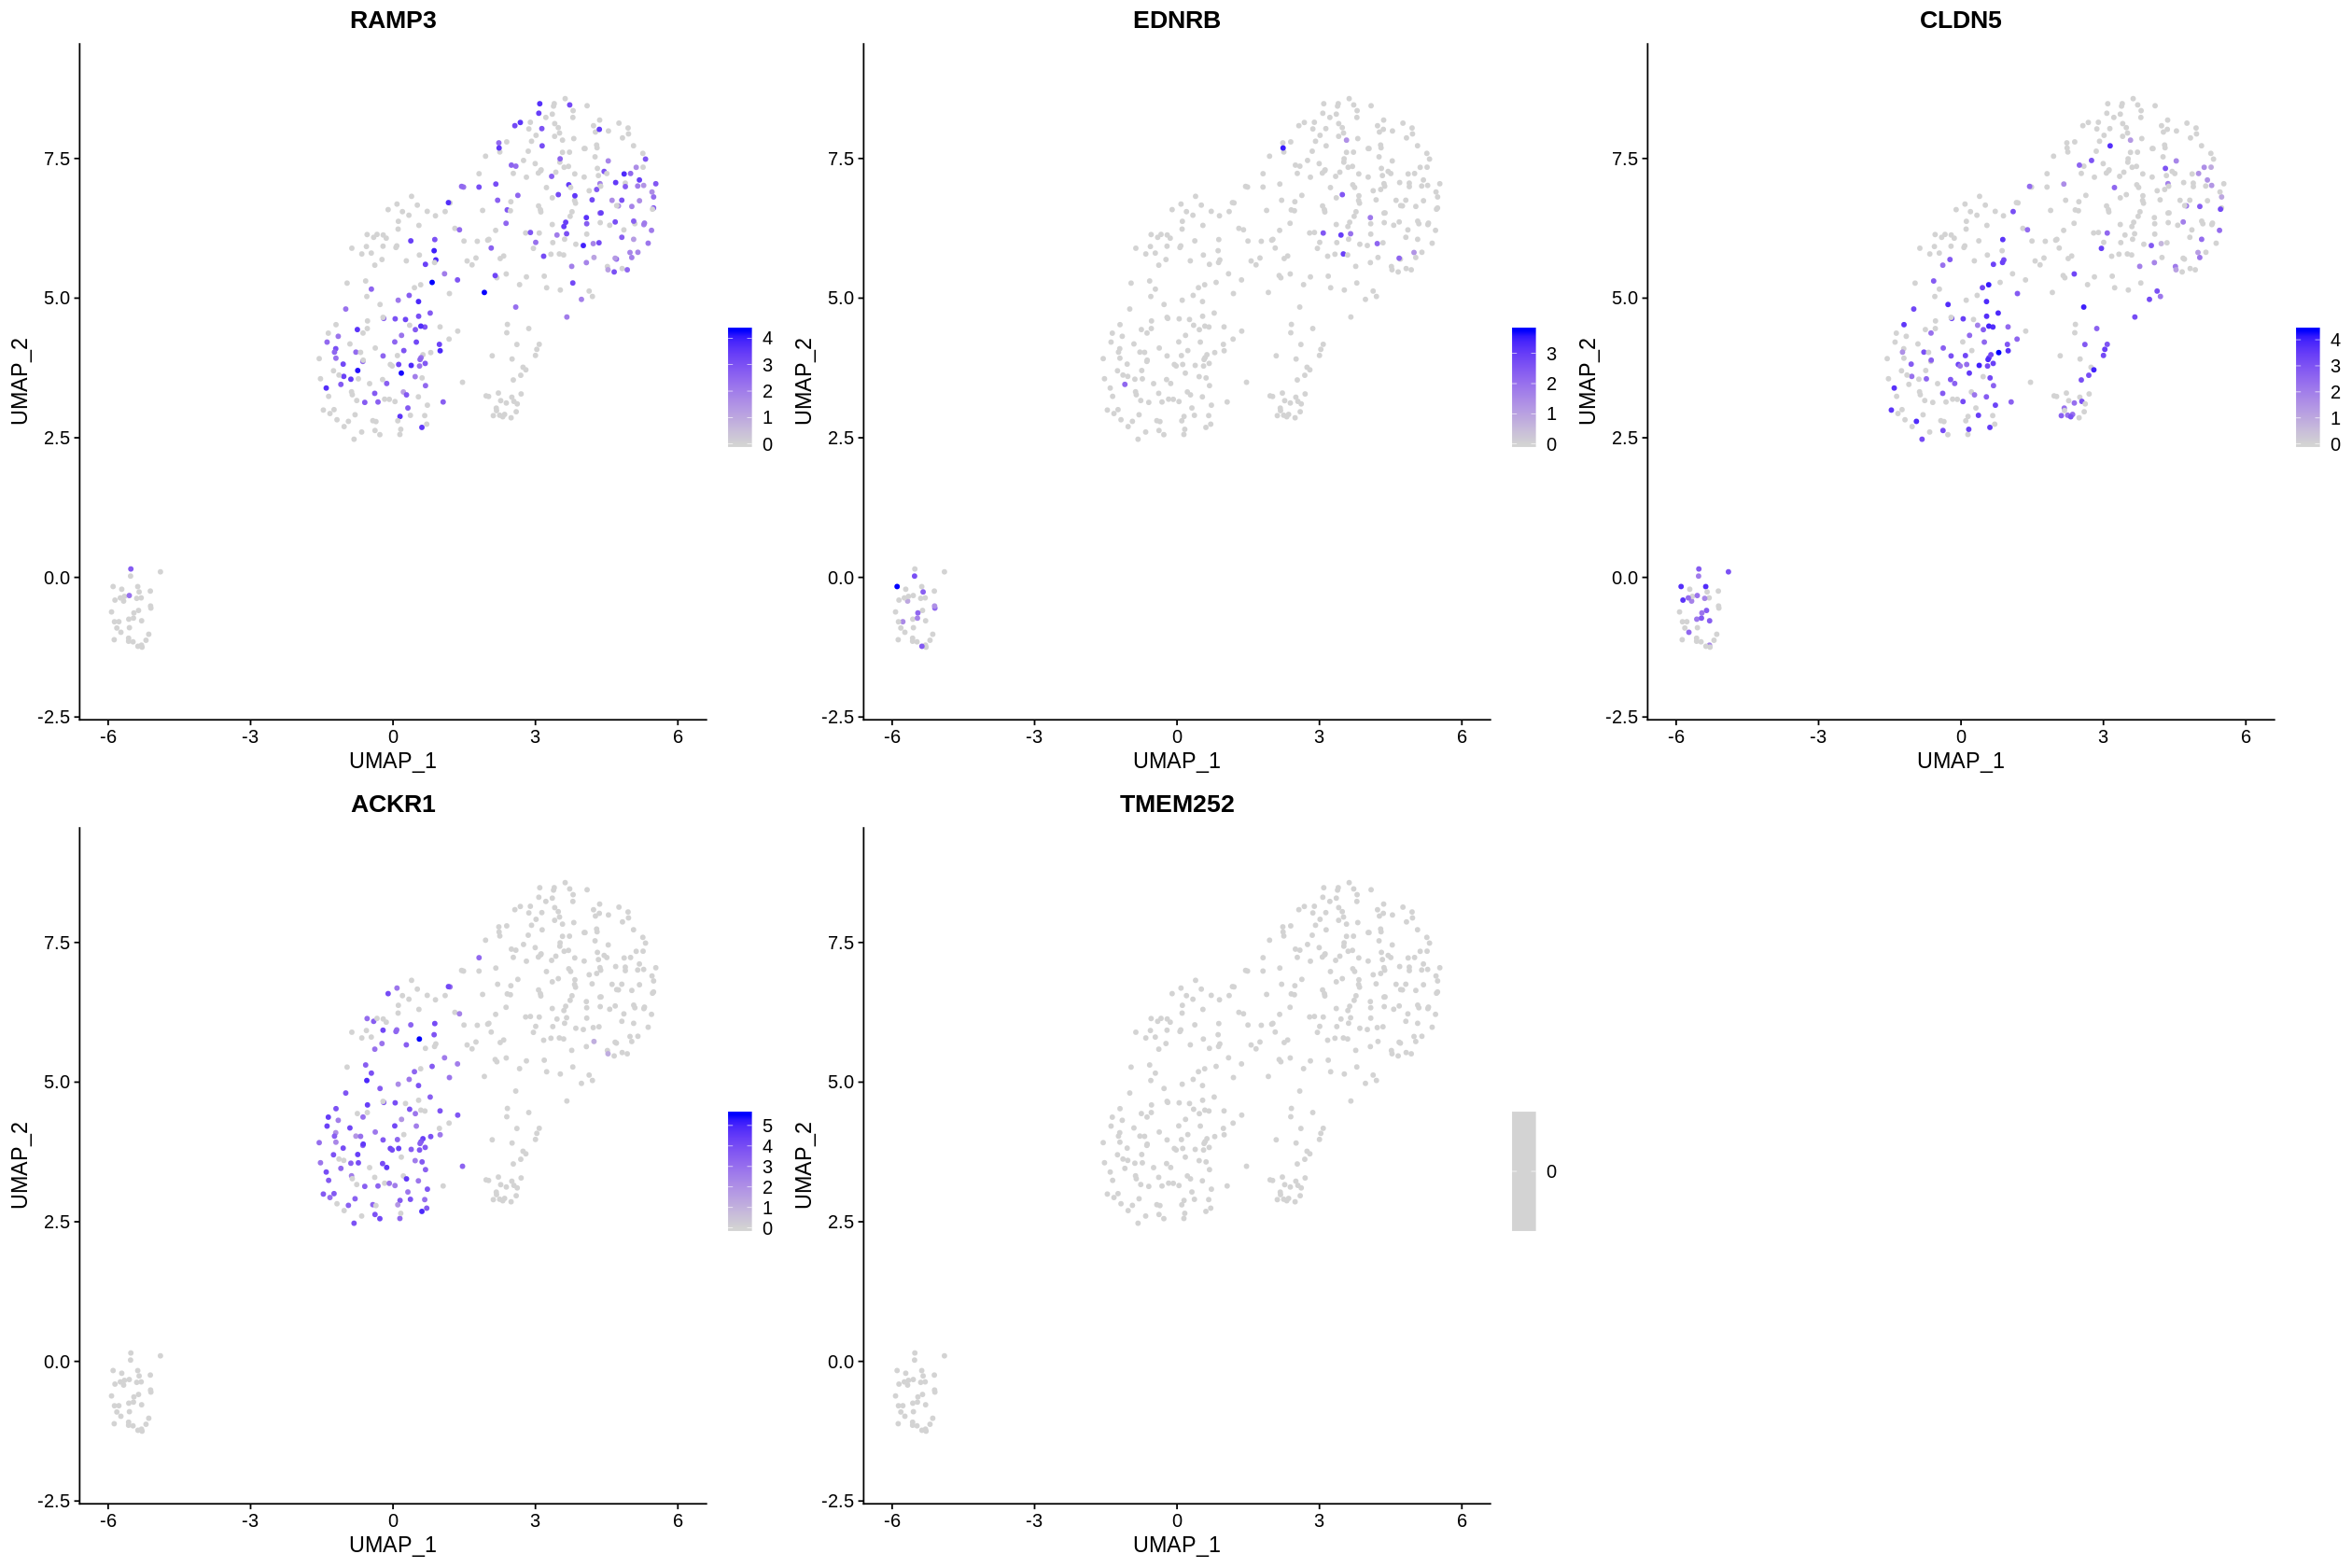

In [36]:
# stalk-like cell marker: 'ACKR1','TMEM252'
# tip-like cell marker: 'RAMP3','EDNRB','CLDN5'
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(endo,features=c('RAMP3','EDNRB','CLDN5','ACKR1','TMEM252'),ncol=3)
options(repr.plot.width=7, repr.plot.height=7)

In [37]:
marker3 <- c('COL4A2','VWA1','ARHGAP29','OAZ2','SHANK3',
             'NTN4','IGFBP3','ACE','MCAM')

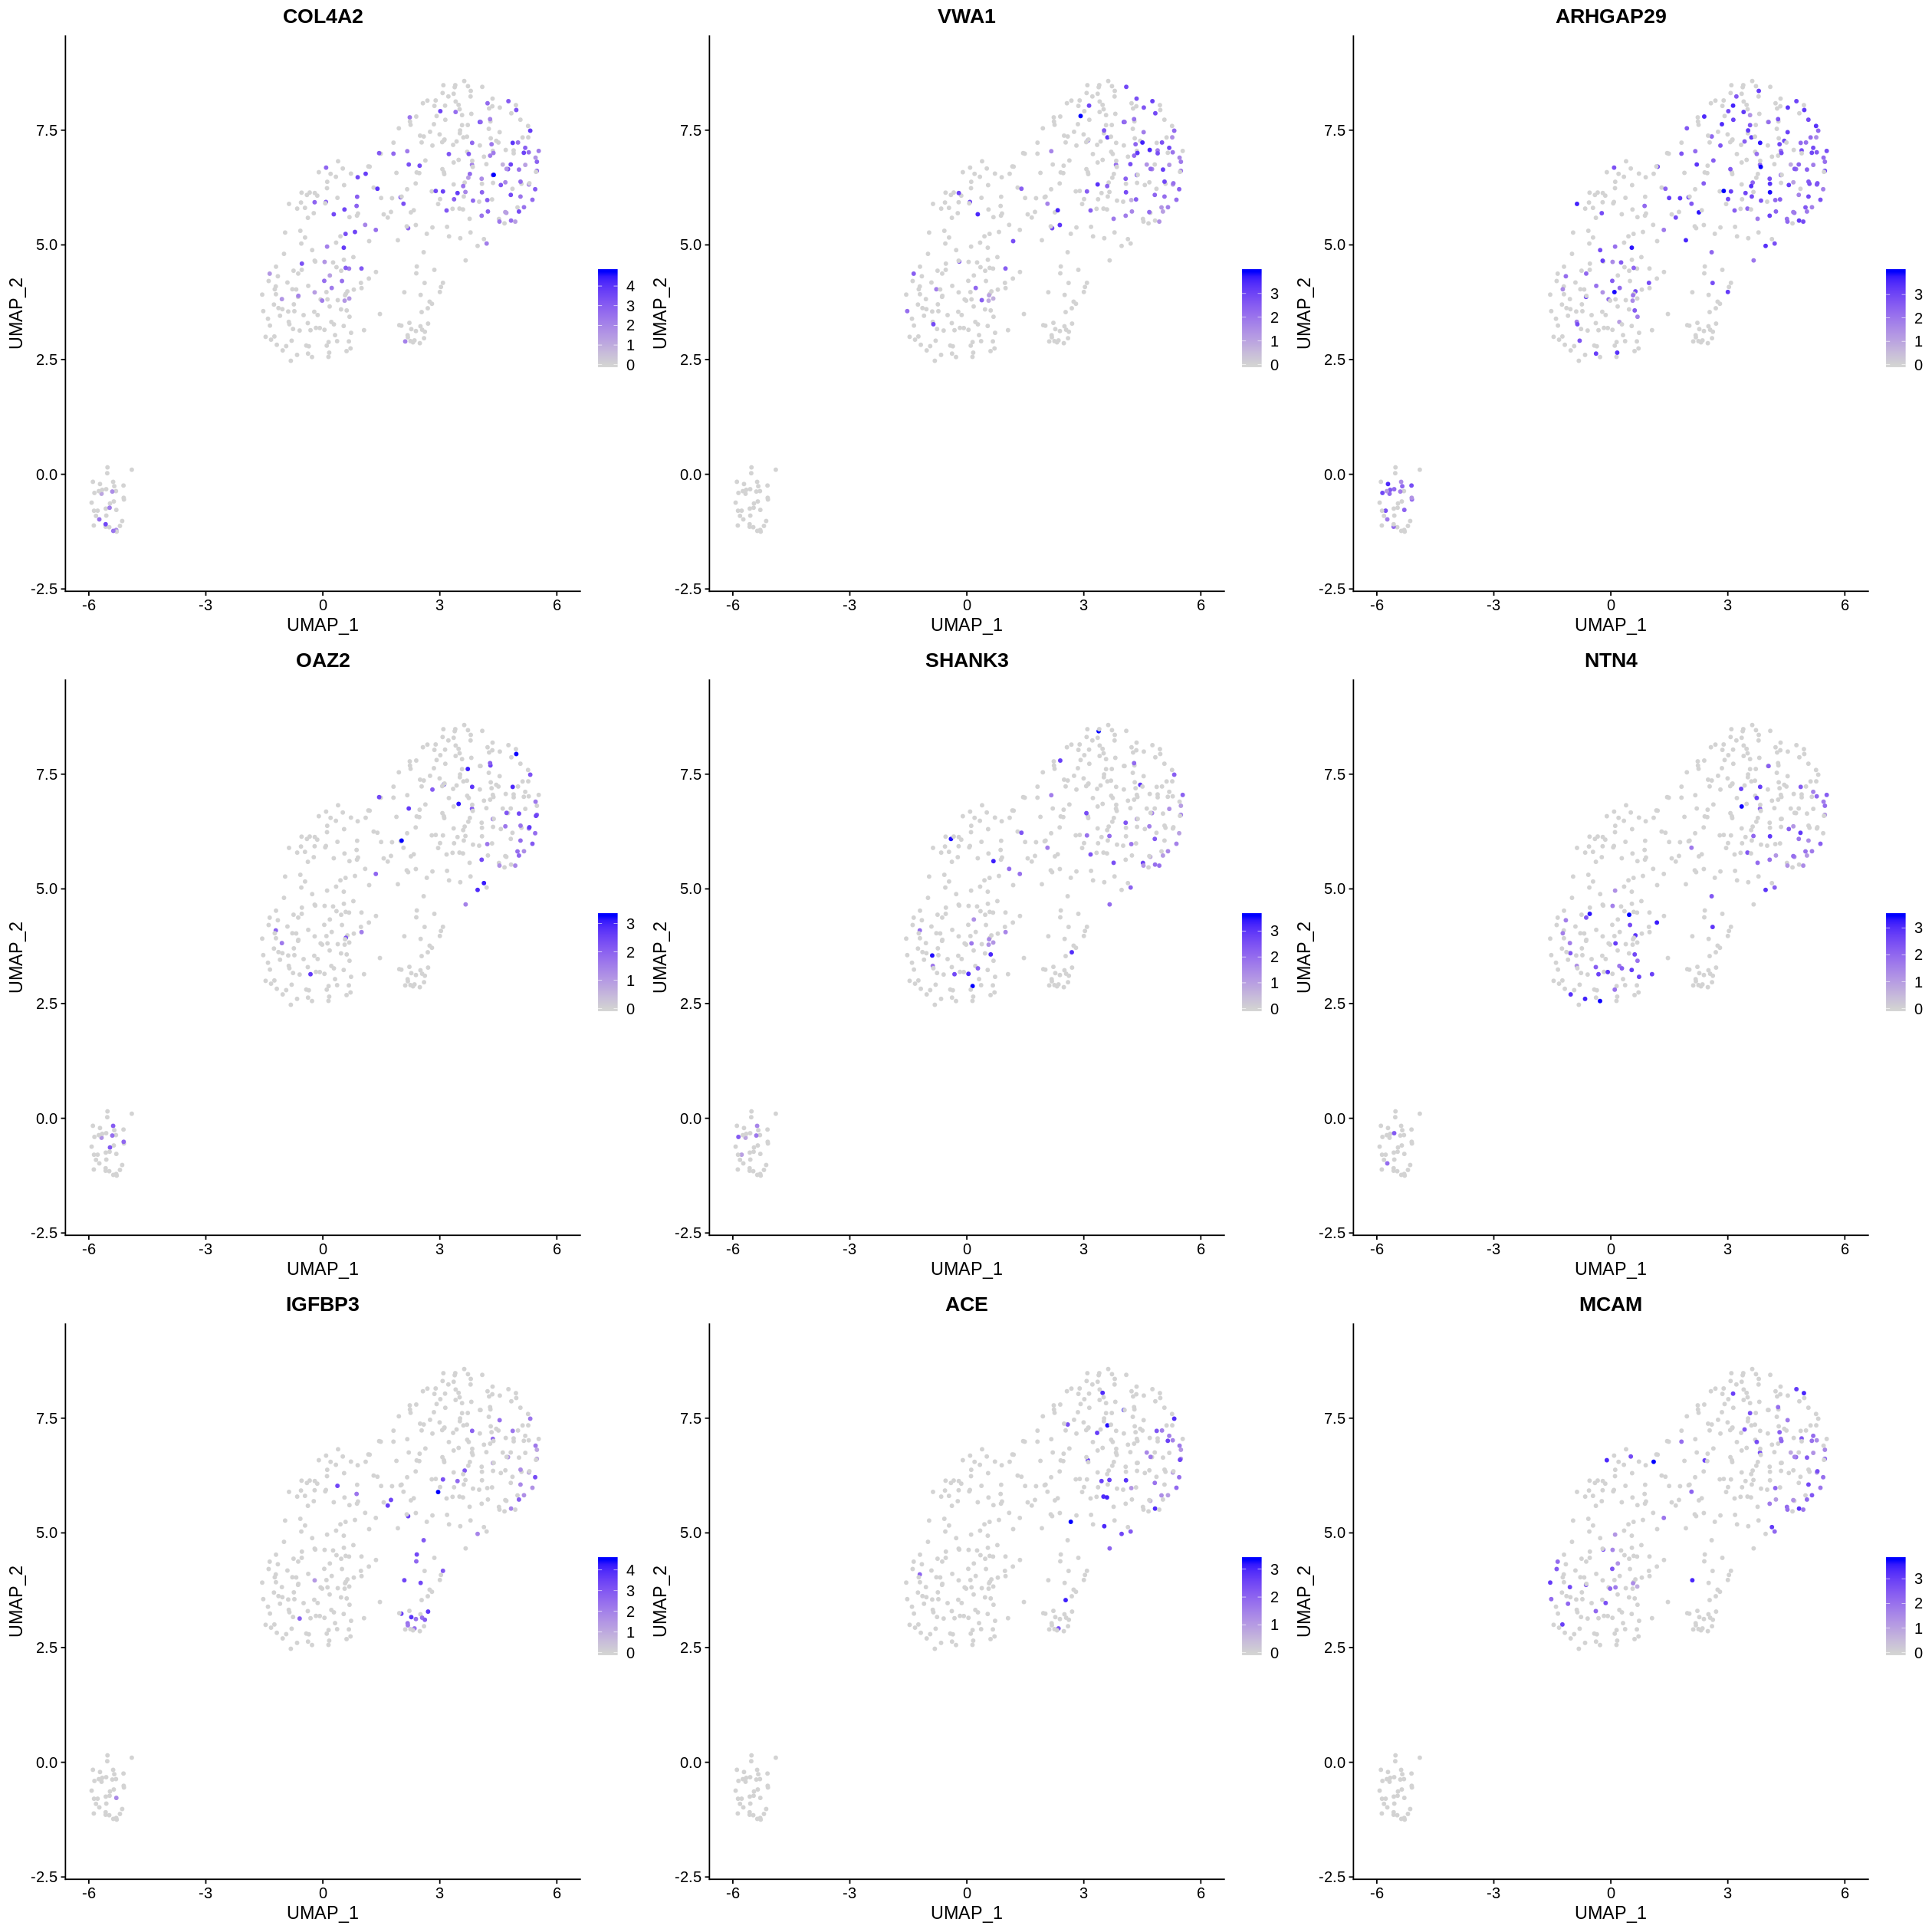

In [38]:
options(repr.plot.width=7*3, repr.plot.height=7*3)
FeaturePlot(endo,features=marker3)
options(repr.plot.width=7, repr.plot.height=7)

In [39]:
marker4 <- c('CCL21','TFF3','PROX1','LYVE1','DOCK5','EFNA5')
marker5 <- c('SERPINE2','SULF1','TSPAN2','FN1','FBLN5','PCSK5')

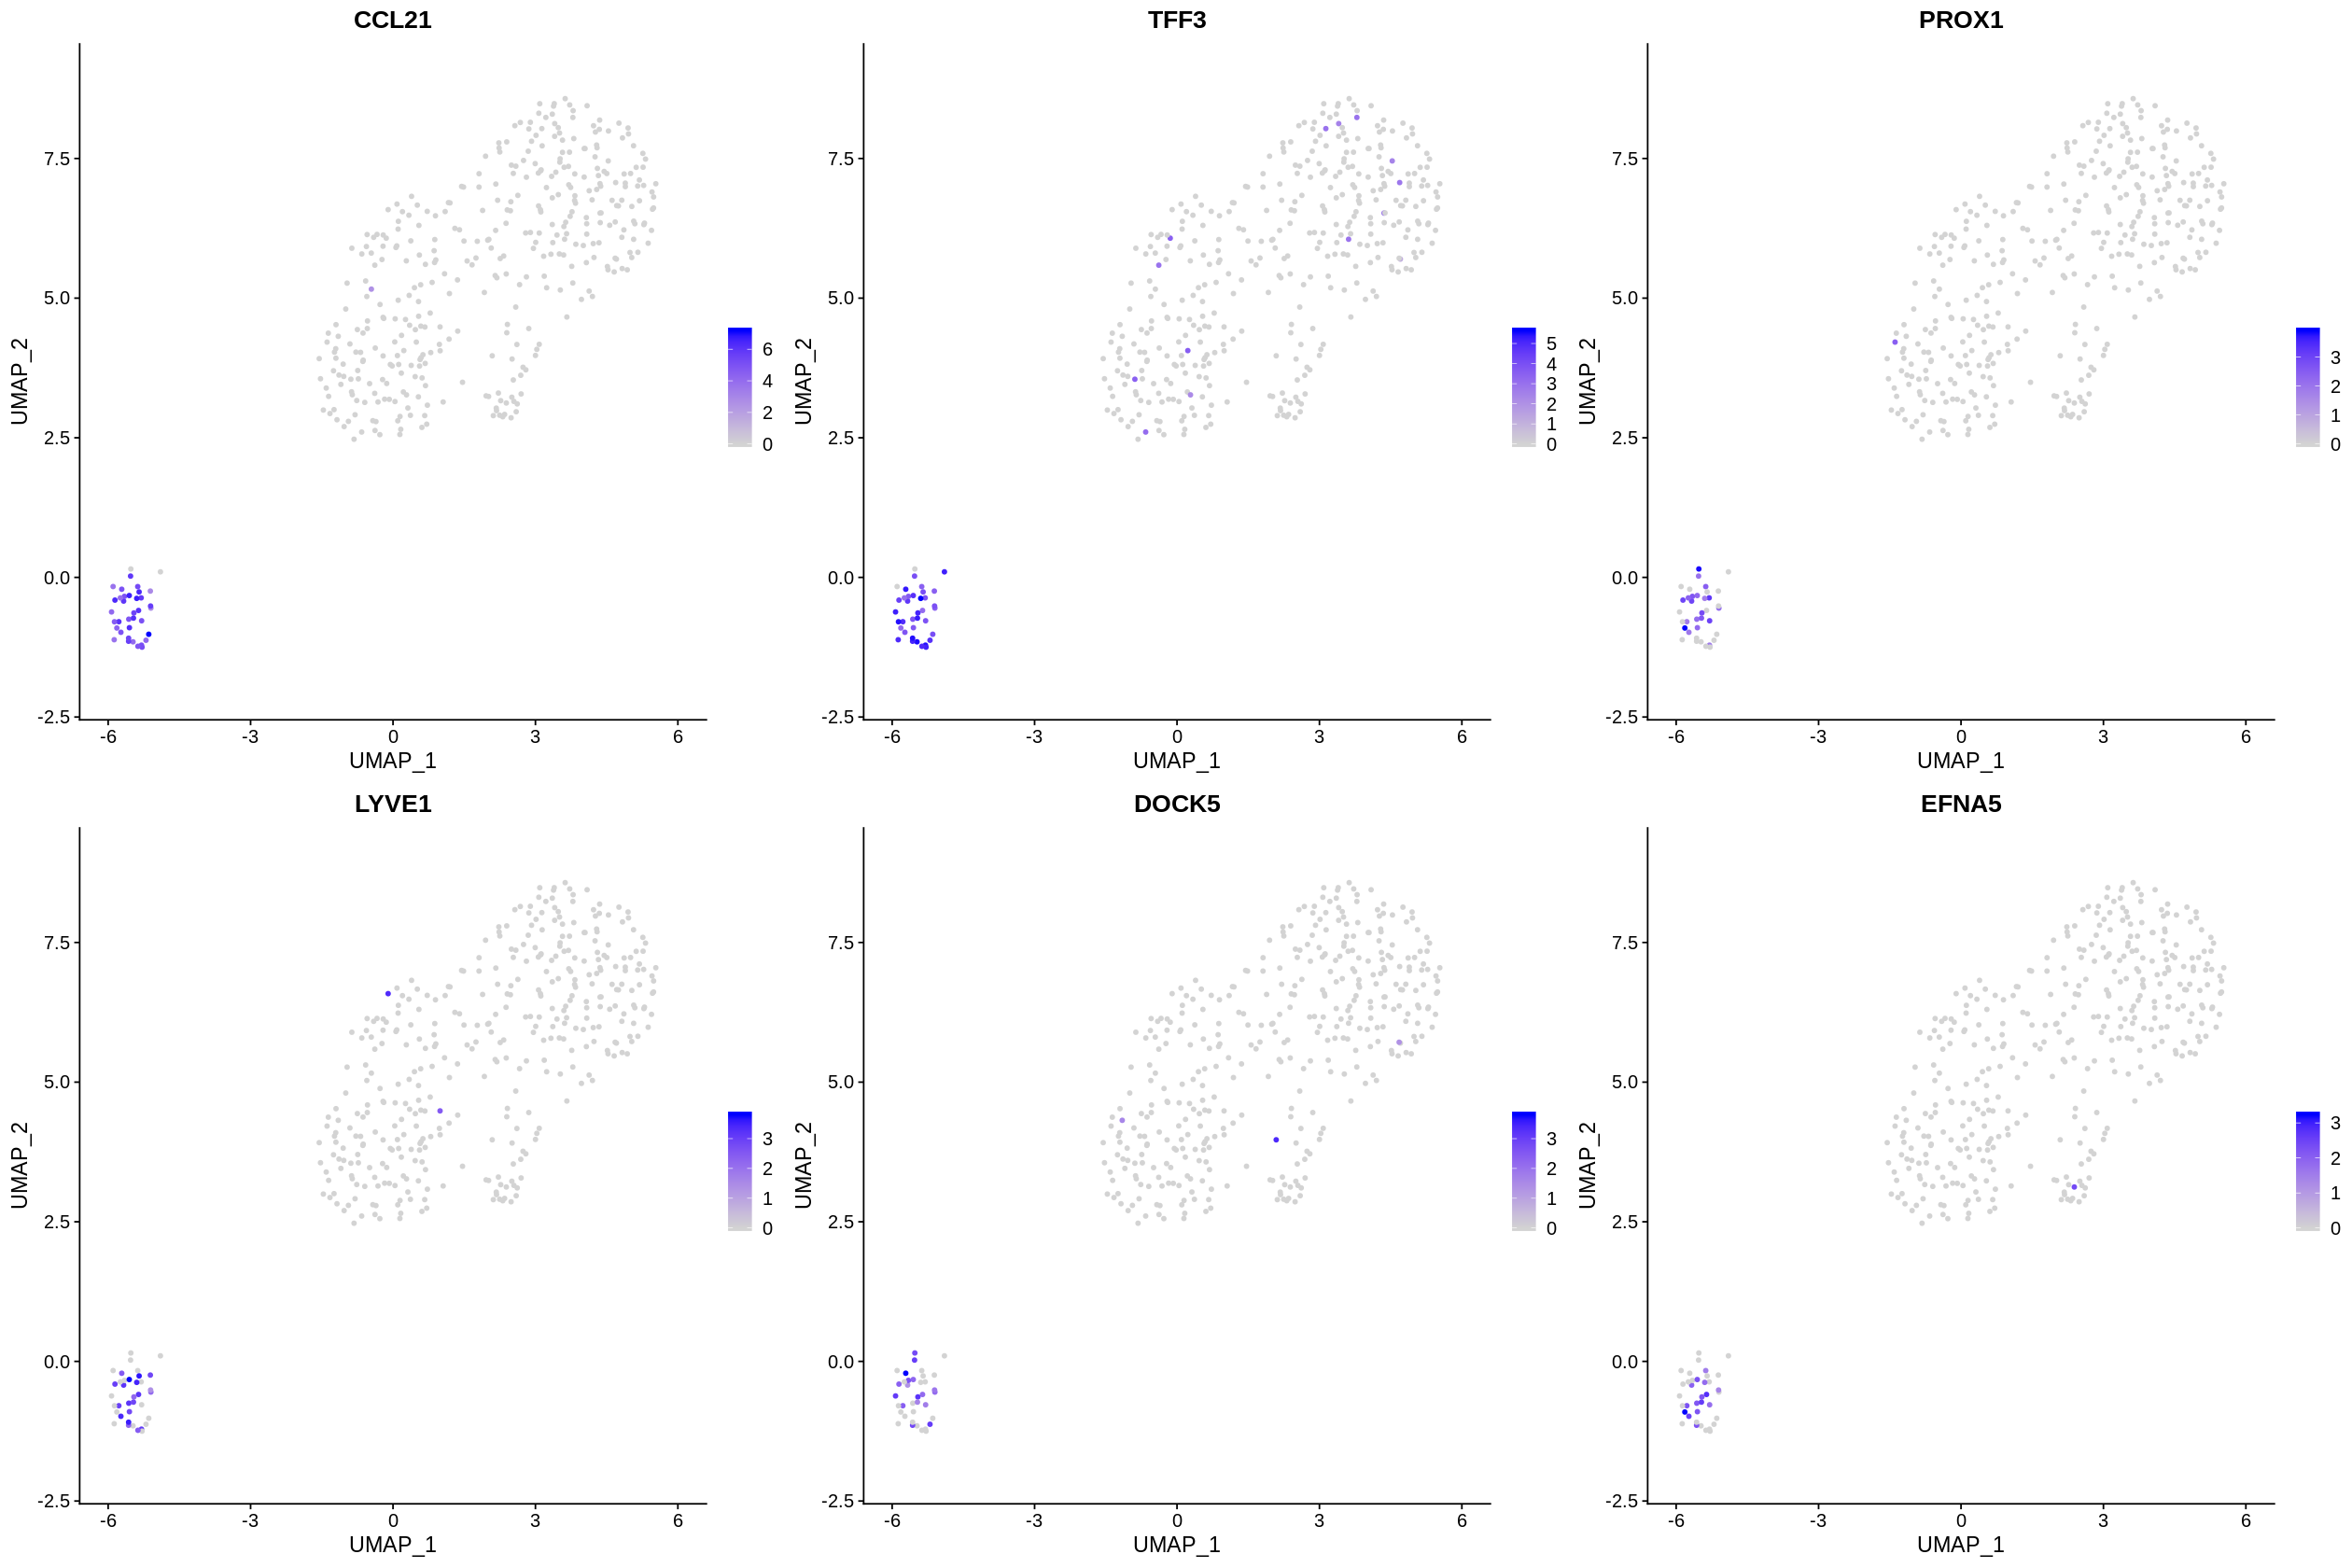

In [44]:
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(endo,features=marker4,ncol=3)
options(repr.plot.width=7, repr.plot.height=7)

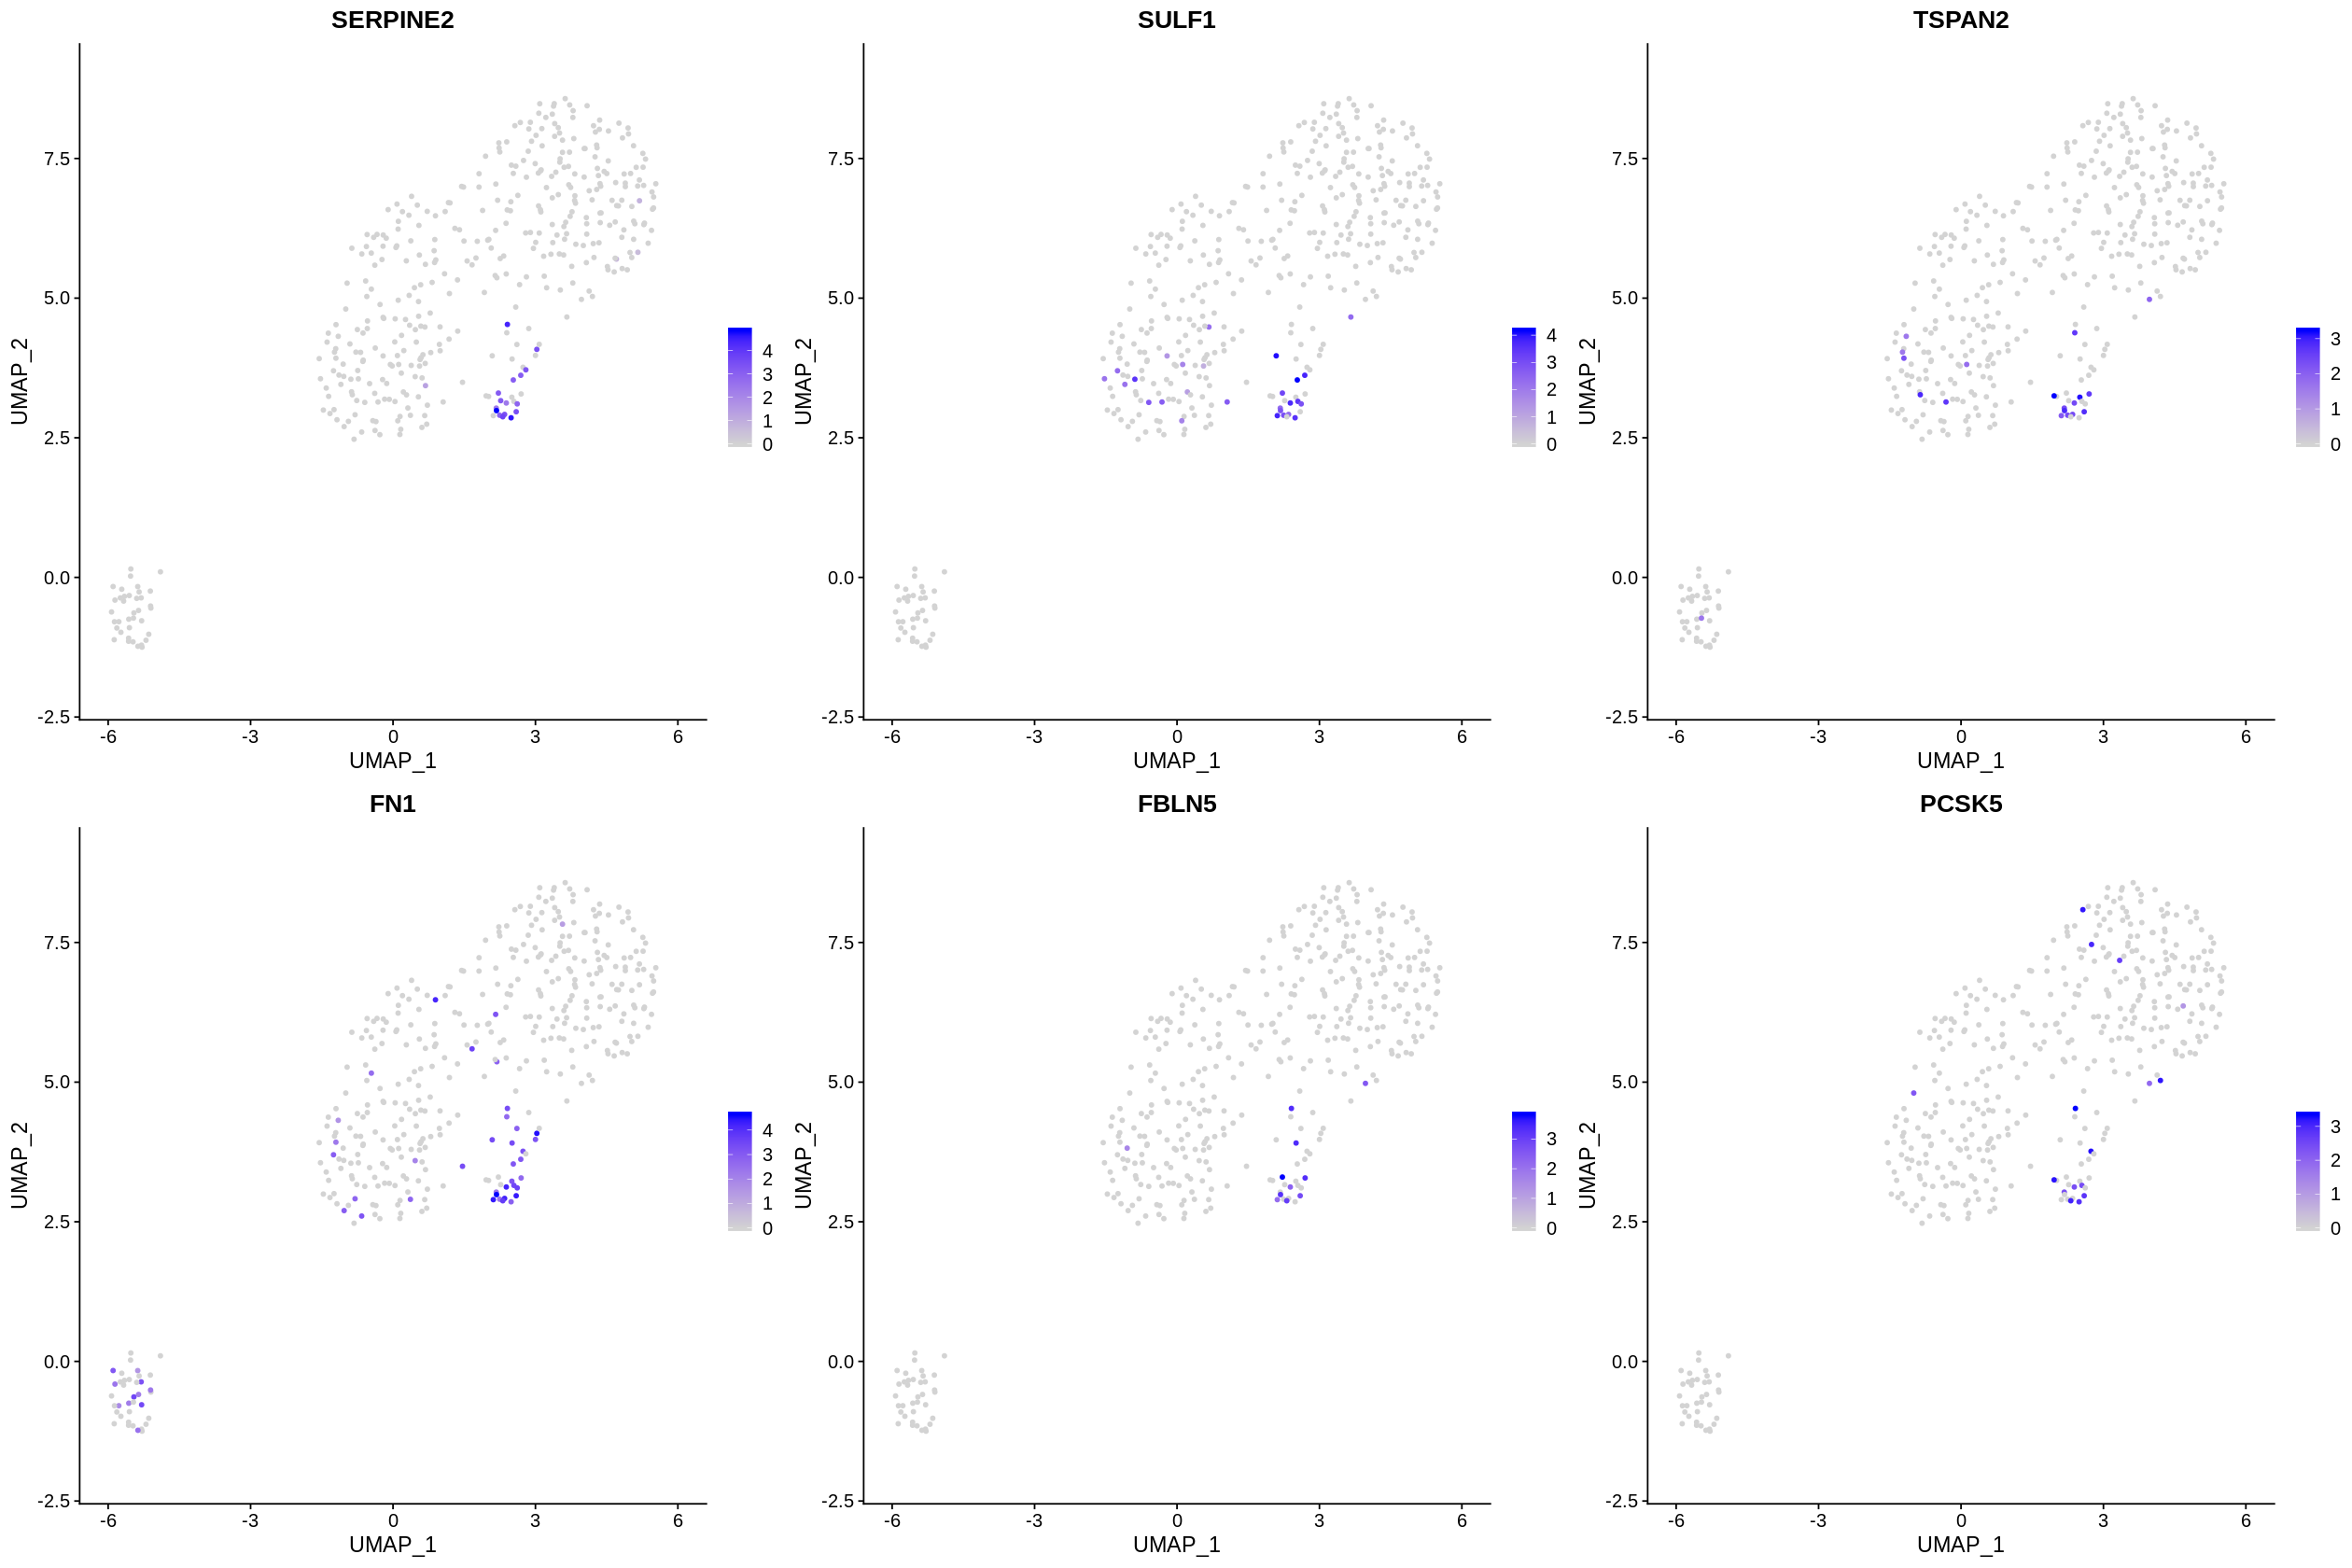

In [45]:
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(endo,features=marker5,ncol=3)
options(repr.plot.width=7, repr.plot.height=7)

In [49]:
types <- c('nonfunctional','inflammatory inducing 1','inflammatory inducing 2','endothelial barrier?',
          'HEV','antiangiogenesis')

In [50]:
endo2 <- endo

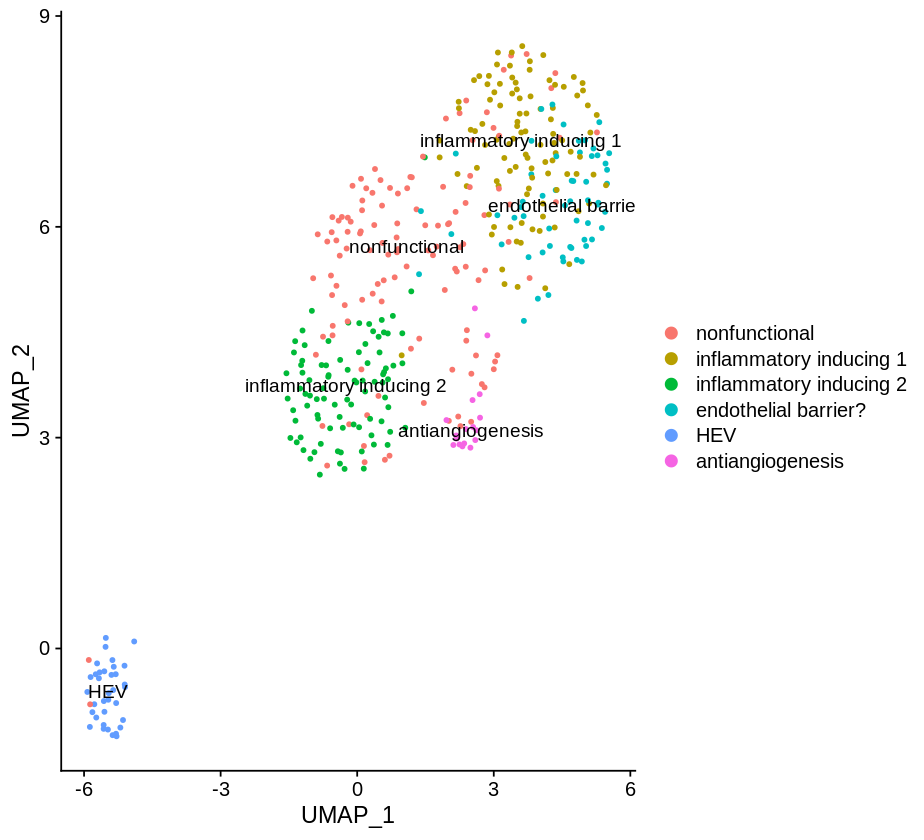

In [51]:
names(types) <- levels(endo2)
endo2 <- RenameIdents(endo2, types)
options(repr.plot.width=7*1.1, repr.plot.height=7)
DimPlot(endo2, reduction = "umap", label = TRUE)

In [52]:
cluster_count <- cluster_count_function(endo2,types)

In [53]:
cluster_count

,10N-total,11N-total,12N-total,14N-total,15N-total,16N-total,17N-total,6N-total,8N-total,9N-total
nonfunctional,8,10,25,0,54,2,12,3,6,4
inflammatory inducing 1,5,19,8,0,26,2,3,8,26,5
inflammatory inducing 2,18,7,2,3,17,3,11,6,10,11
endothelial barrier?,7,13,5,1,1,5,3,0,17,5
HEV,4,2,2,5,1,10,4,2,3,2
antiangiogenesis,1,2,6,0,2,2,3,0,0,1


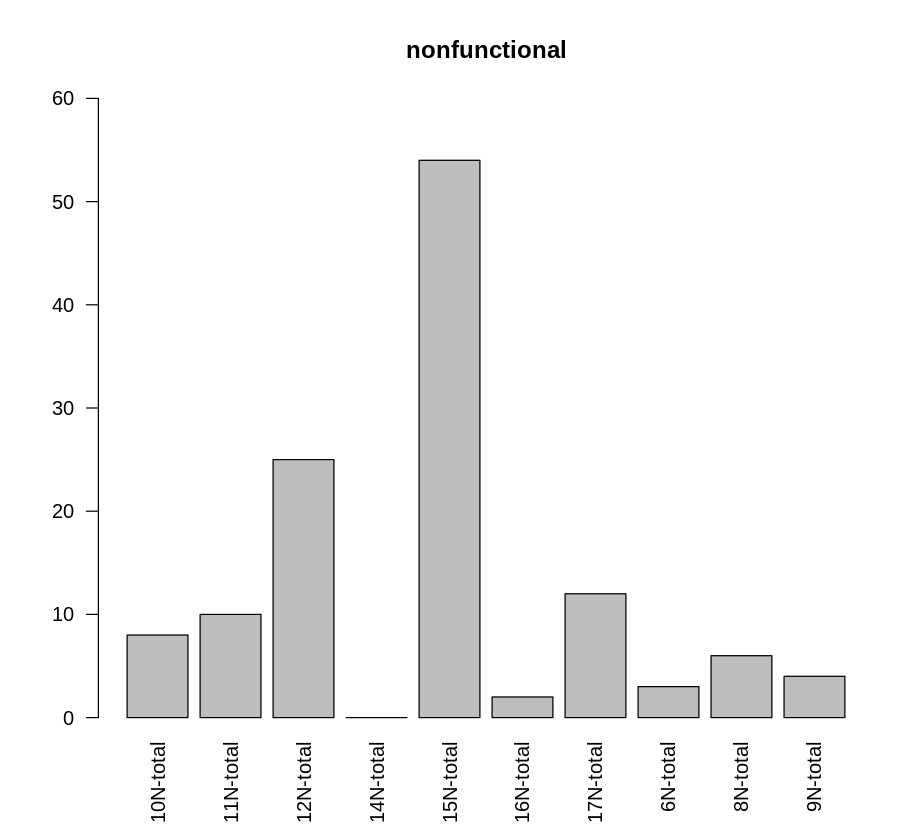

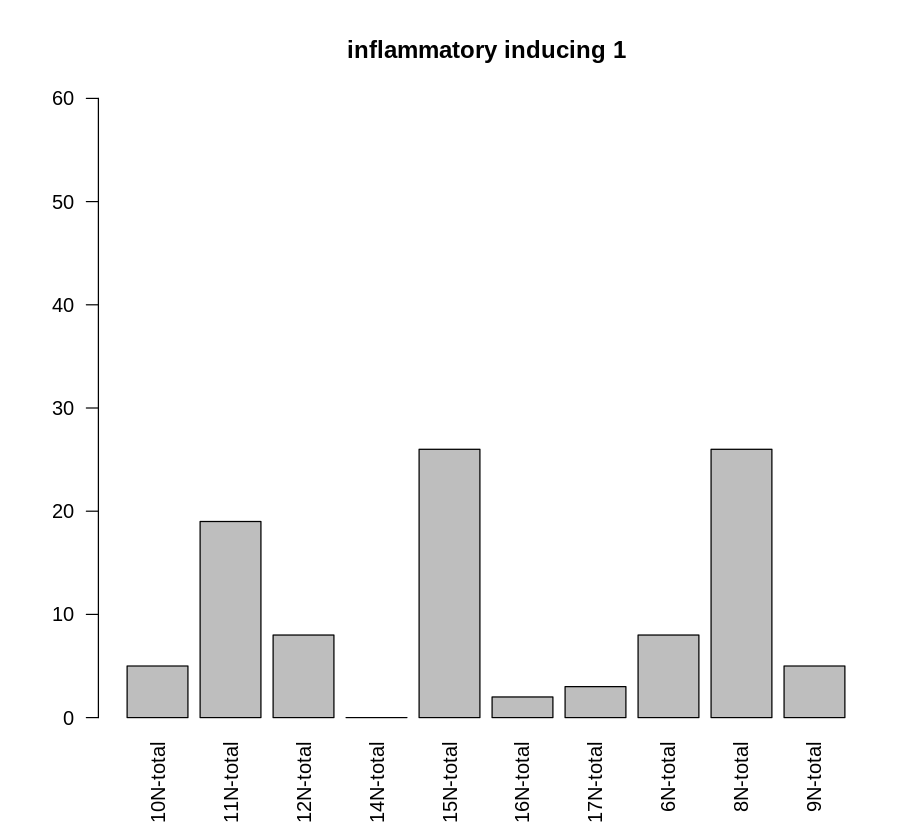

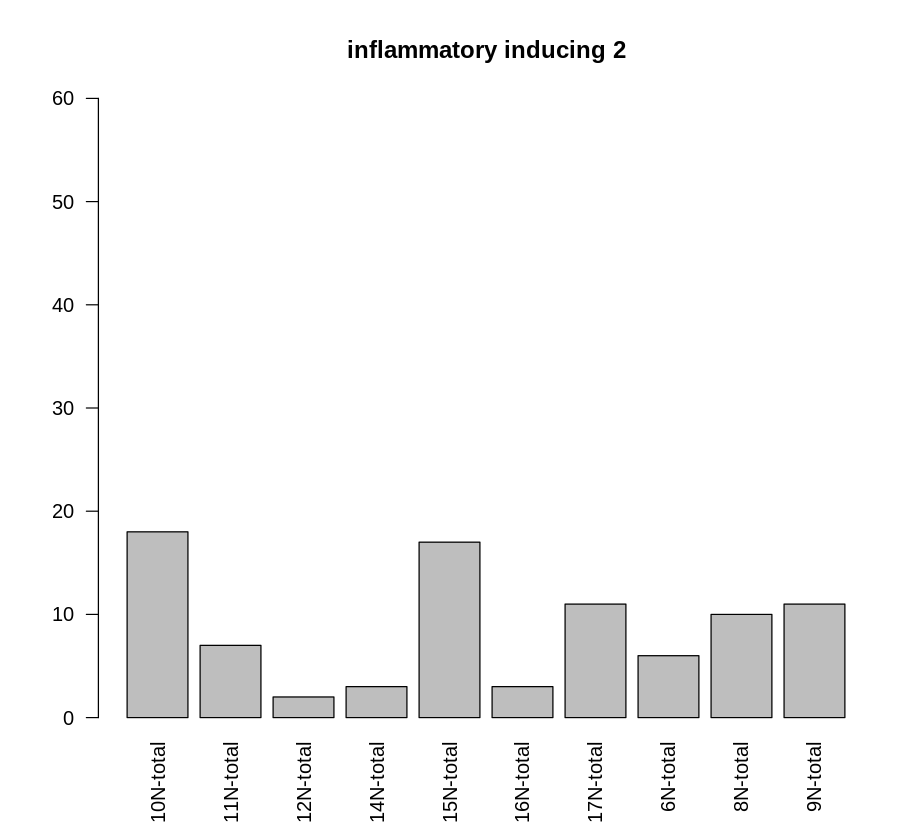

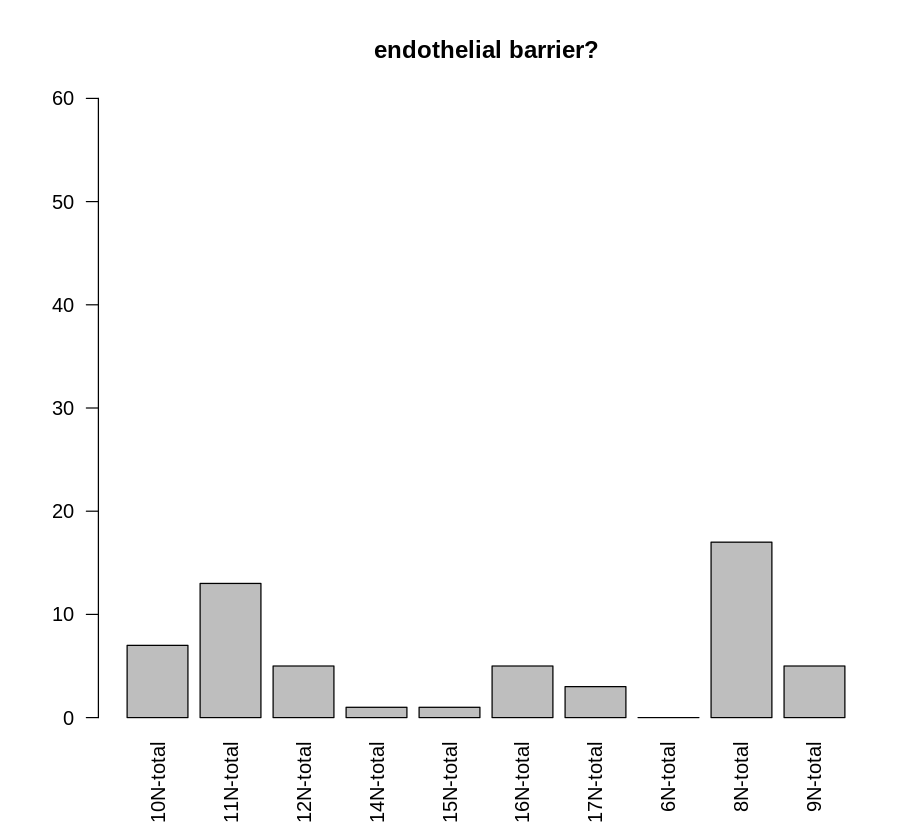

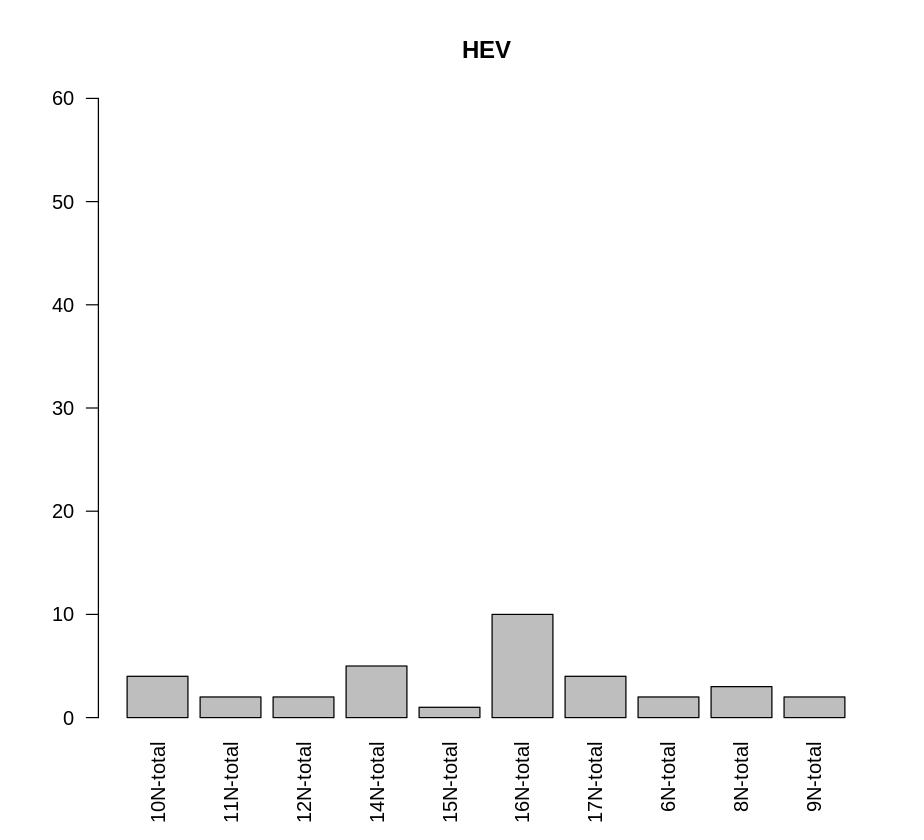

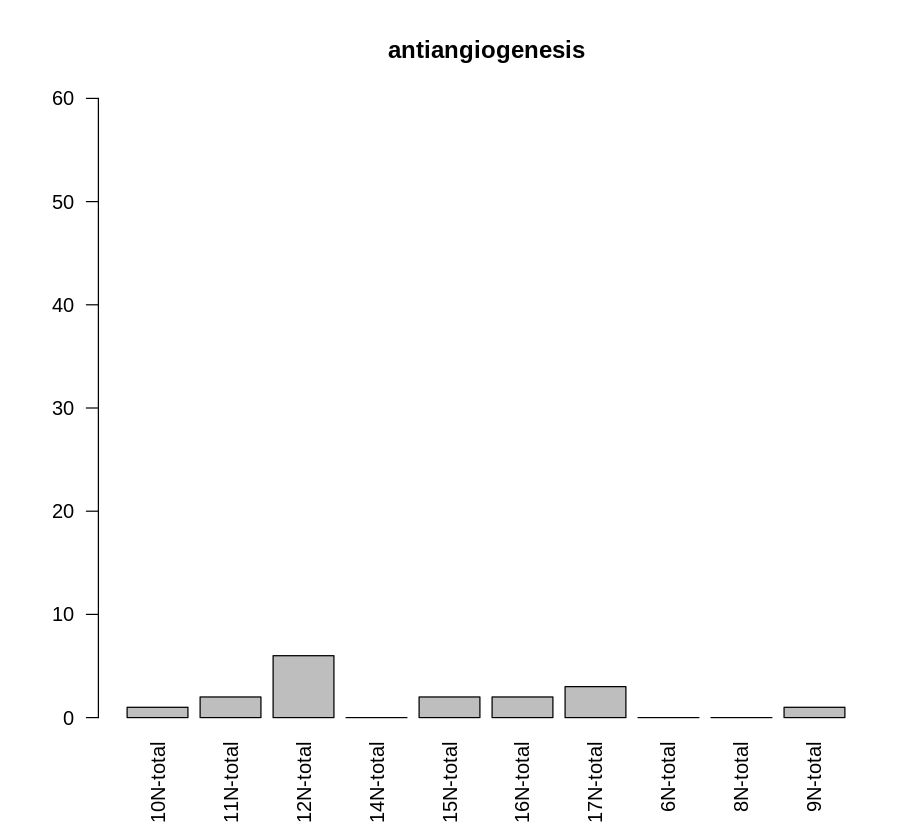

In [55]:
for (i in 1:dim(cluster_count)[1]){
    barplot(cluster_count[i,],las=2, main=rownames(cluster_count)[i],ylim=c(0,60))
}

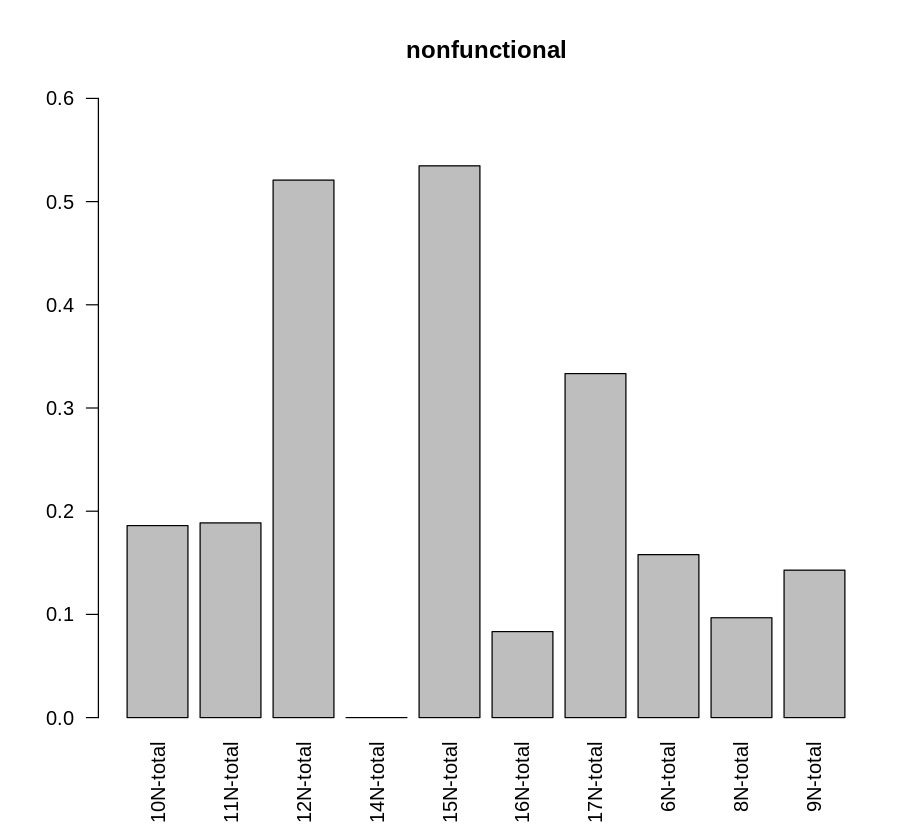

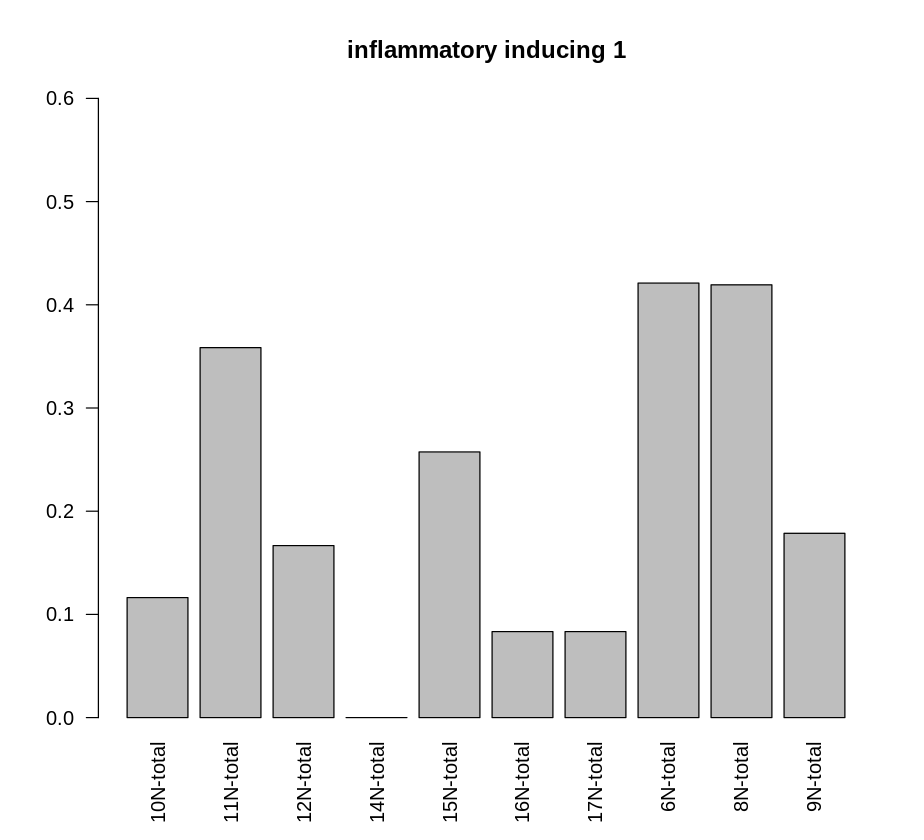

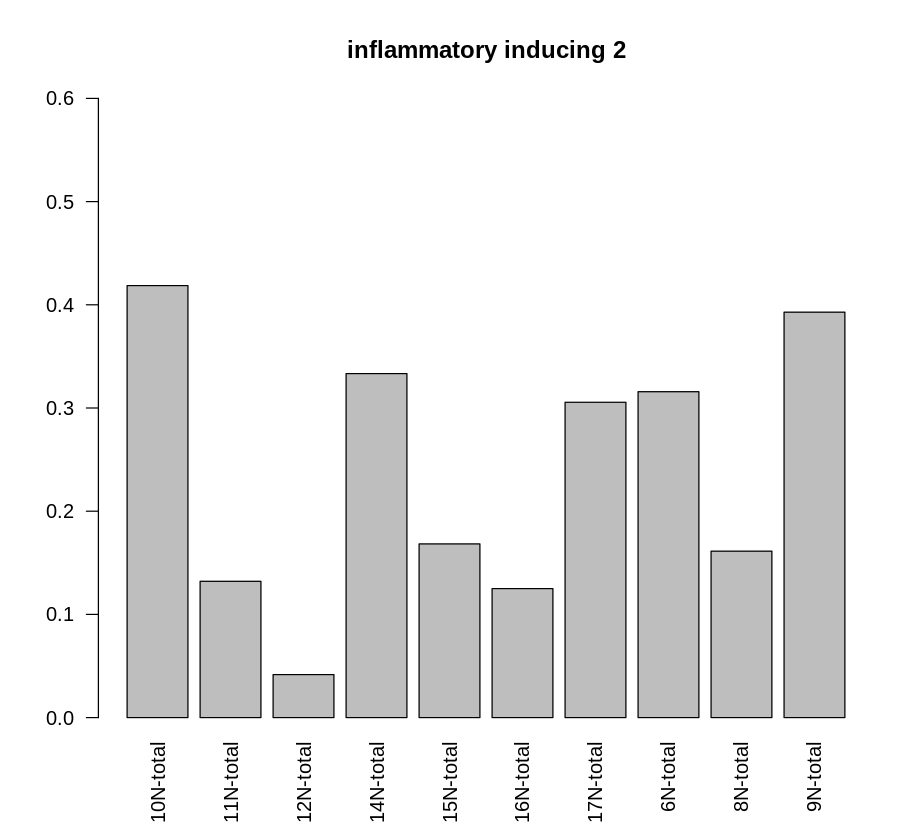

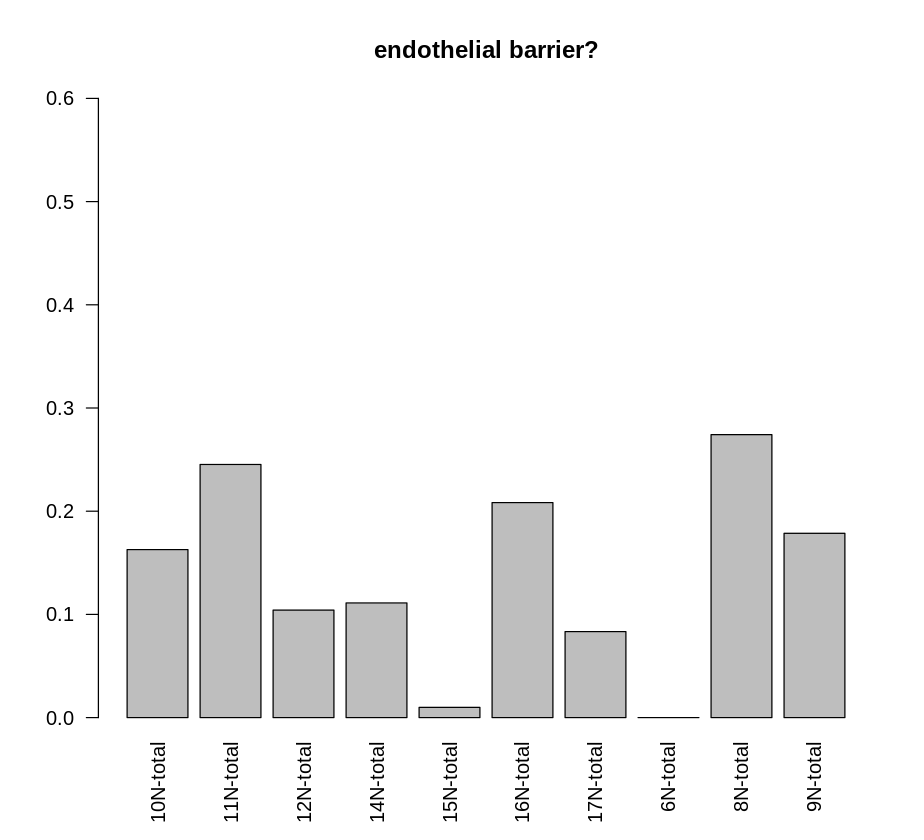

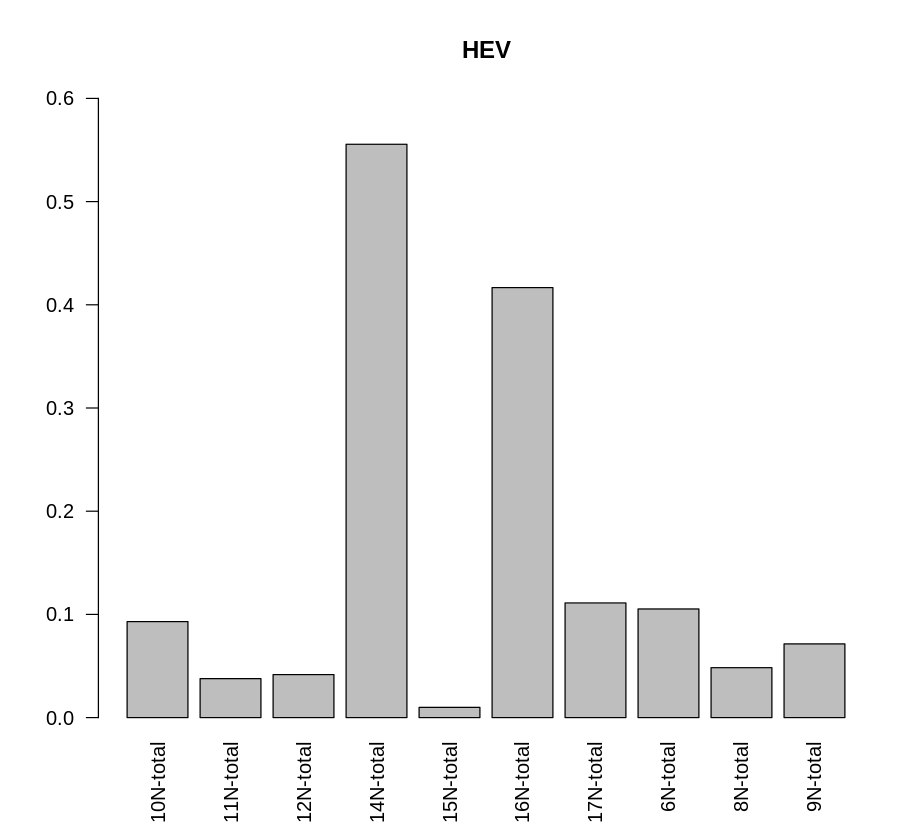

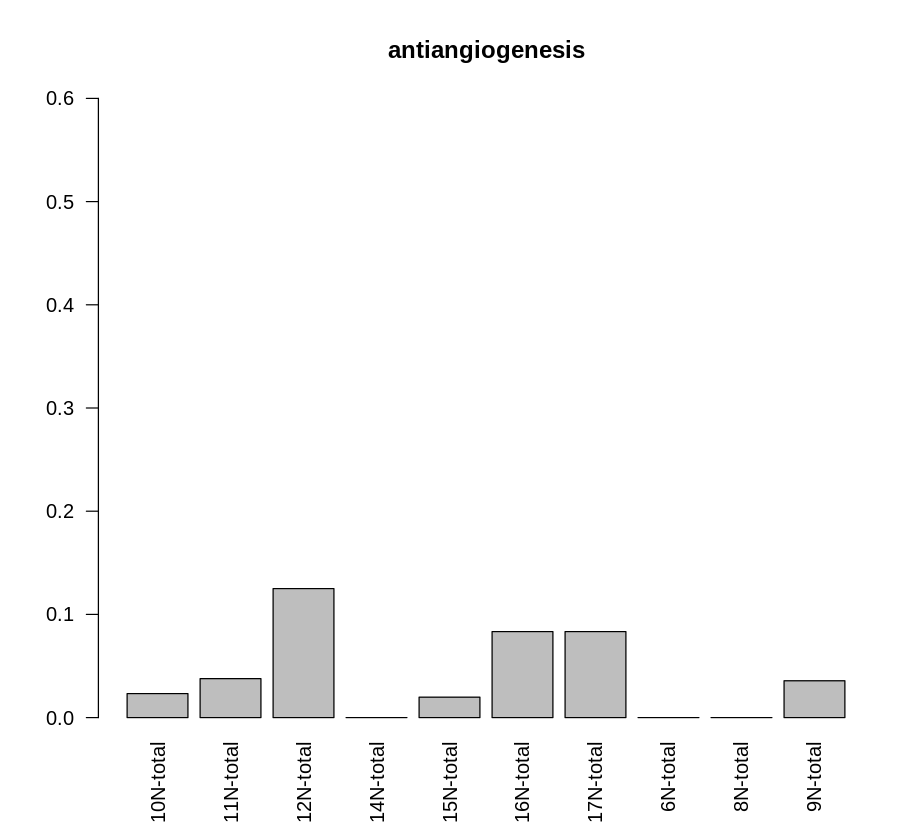

In [58]:
for (i in 1:dim(cluster_count)[1]){
    barplot(cluster_count[i,]/table(endo[[]]$orig.ident),las=2, main=rownames(cluster_count)[i],ylim=c(0,0.6))
}

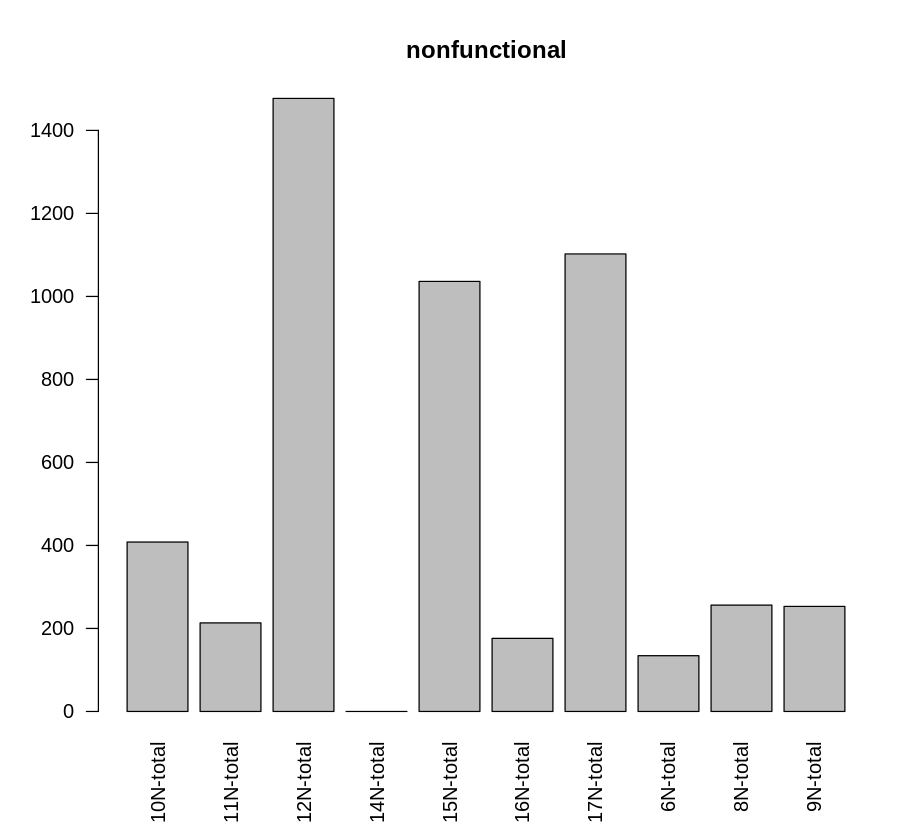

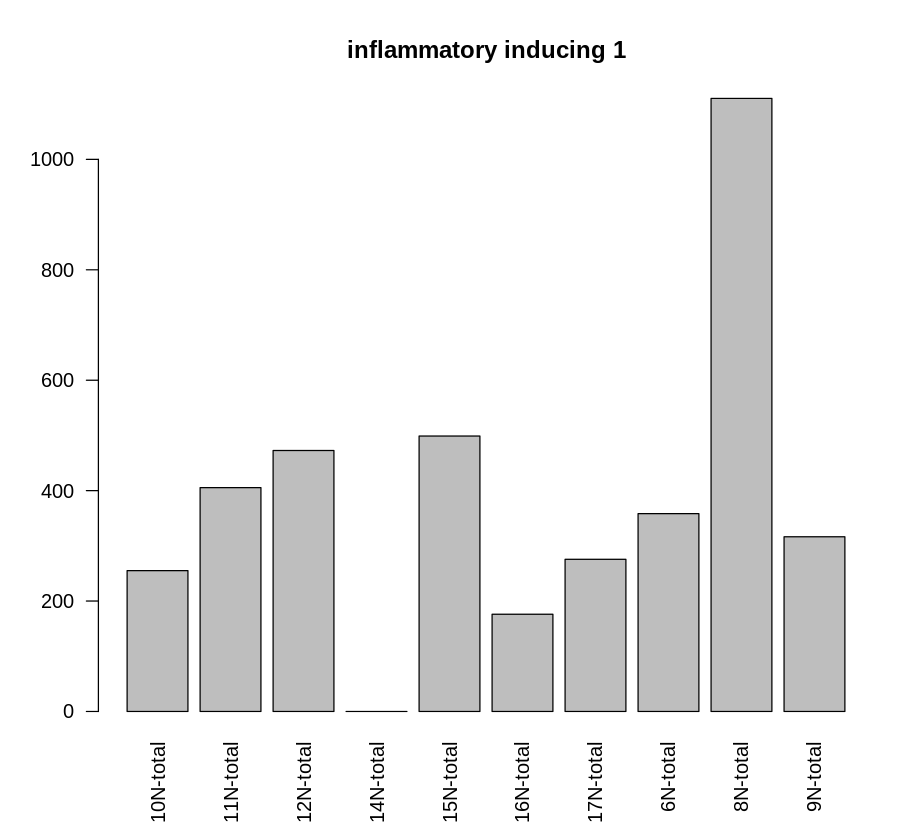

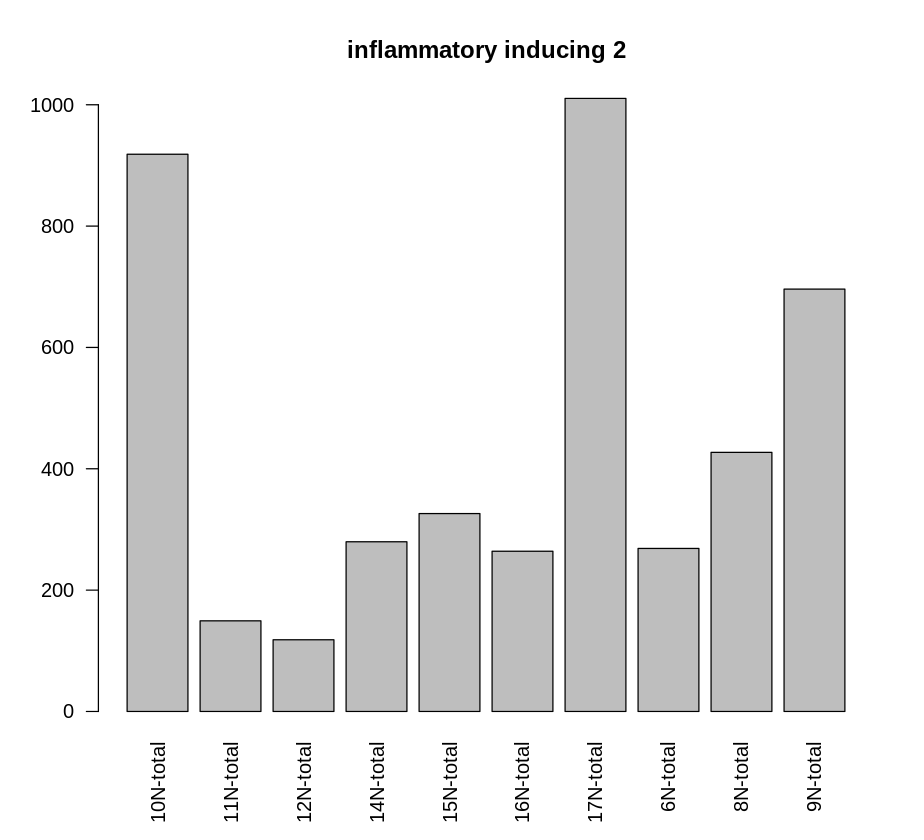

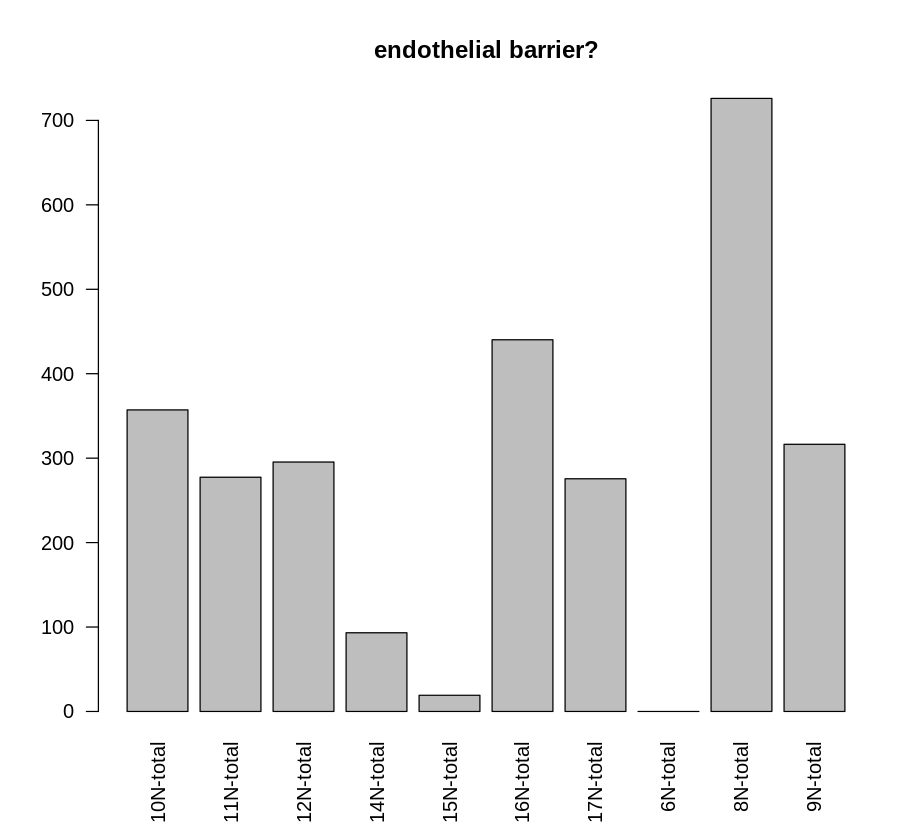

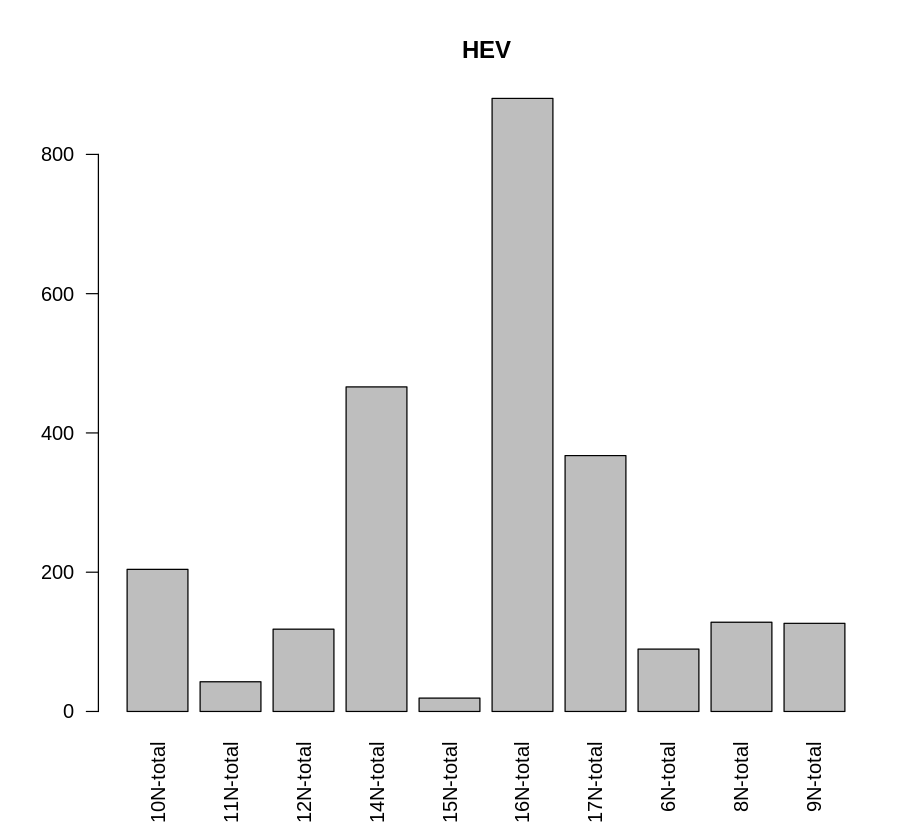

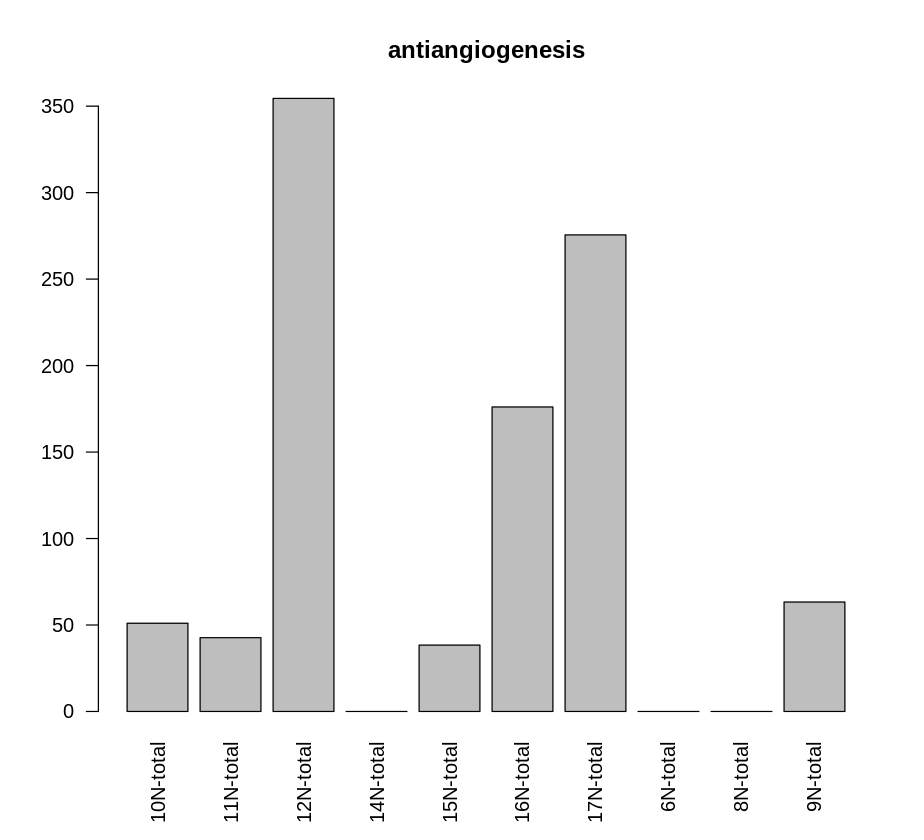

In [60]:
for (i in 1:dim(cluster_count)[1]){
    barplot(cluster_count[i,]/table(endo[[]]$orig.ident)*table(all[[]]$orig.ident),las=2, main=rownames(cluster_count)[i])
}